# Business Case:

## Predict the skin diseases to suggest the doctor for identification of the skin diseases of the patient at the earliest. 

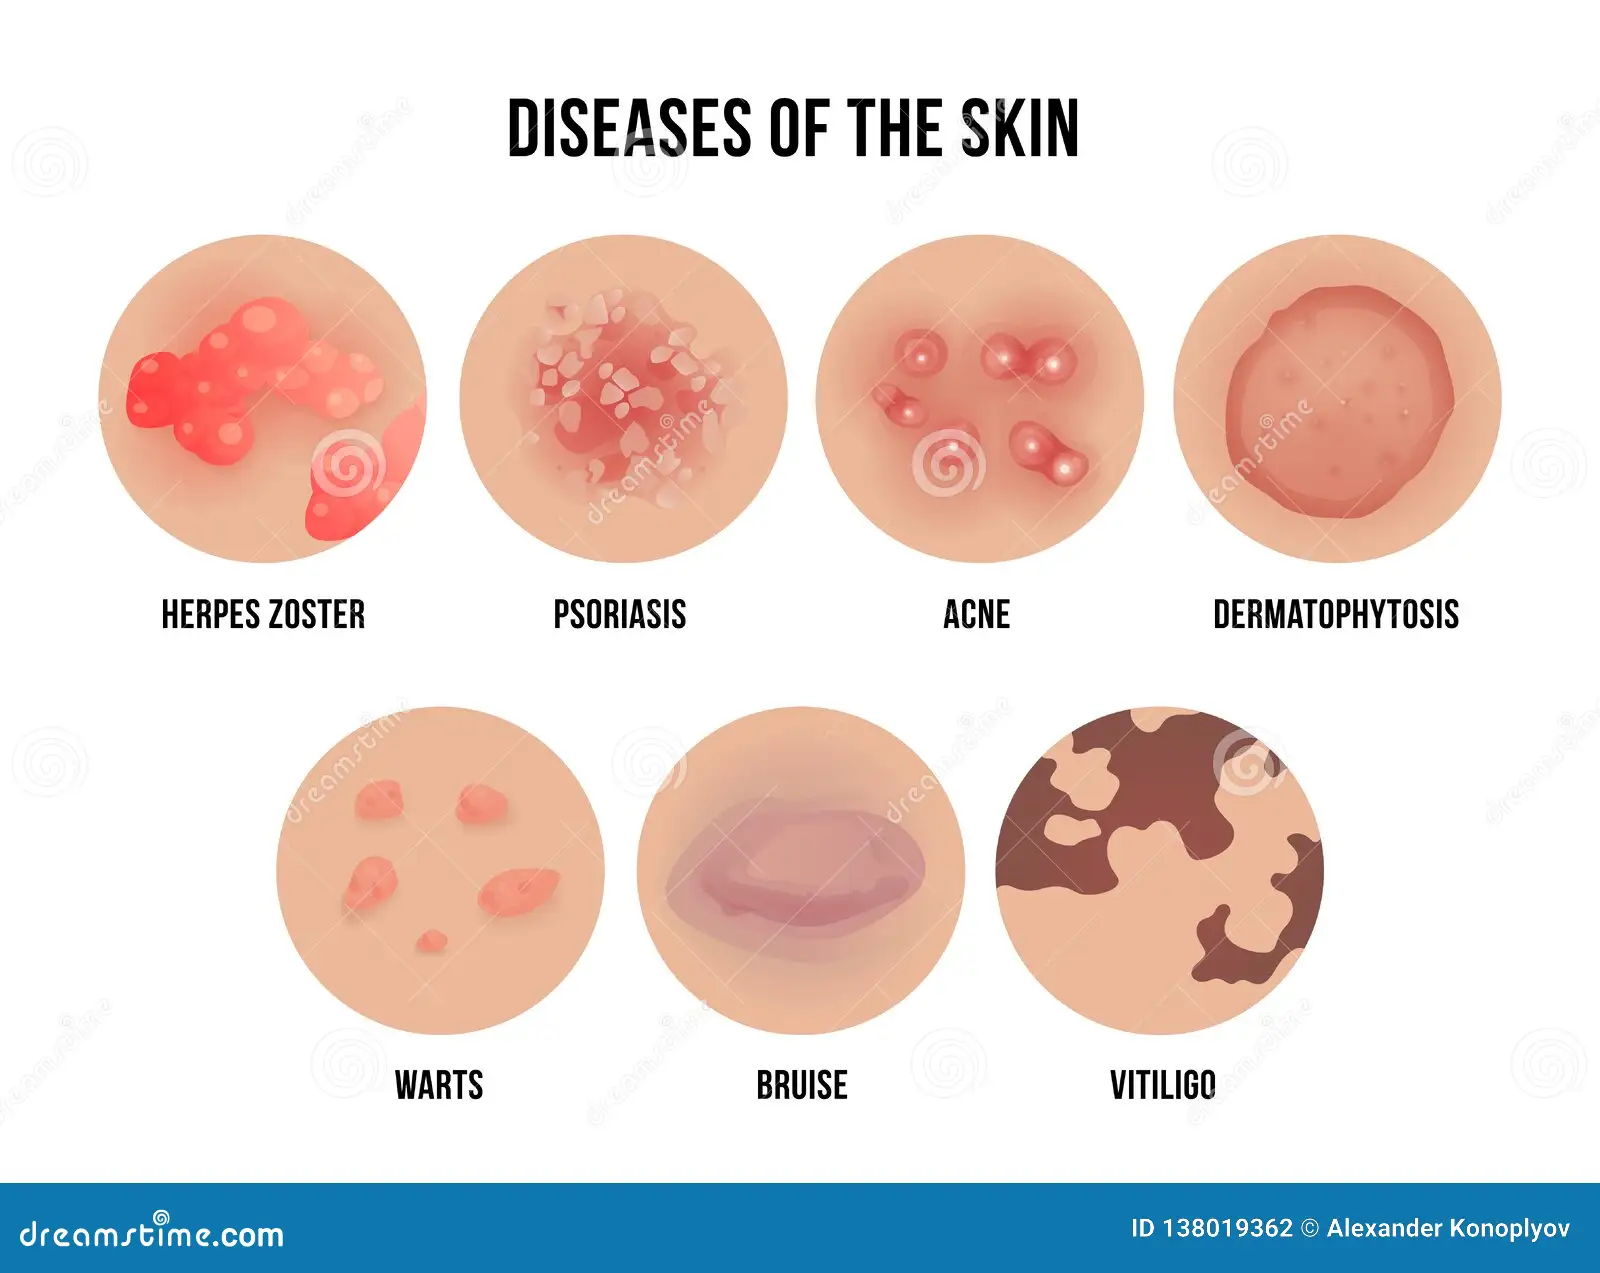

A complex topic such as dermatology makes it one of the most unexpected and challenging professions to diagnose due to the complexities of the subject matter involved. 
Dermatologic diseases are the most predominant kind of disease globally. Despite its prevalence, it is challenging to diagnose and needs a high level of expertise. According to a poll, around 24% of the population contacts their general practitioner (GP) with a skin concern in a single year. 
Using a technique not restricted by these limits is essential to diagnose skin diseases without these limitations. This work provides an automated image-based method for diagnosing and categorizing skin problems that use machine learning classification. 

### Importing required libraries

In [39]:
# Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## For Data Visualization

from fasteda import fast_eda
import dabl

## For Data Preprocessing

from sklearn.preprocessing import StandardScaler
from math import sqrt

## Different Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## For Model selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold

## For Model Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('dataset_35_dermatology.csv')
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


### Basic Checks

In [3]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [5]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

- In this dataset, Age column contains string datatype, which requires to converted in integer.

In [6]:
data['Age'] = data['Age'].replace('?',0)
data['Age'] = data['Age'].astype(int)
data['Age']=data['Age'].replace(0,data.Age.median())

In [7]:
data.Age.unique()

array([55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17,
       51, 42, 44, 33, 43, 50, 34, 35, 15, 46, 62, 48, 12, 52, 60, 32, 19,
       29, 25, 36, 13, 27, 31, 28, 64, 39, 47, 16,  7, 70, 37, 61, 67, 56,
       53, 24, 58, 49, 63, 68,  9, 75])

In [8]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.363388,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.037366,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [9]:
data['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [10]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


### EDA

- Univariate EDA

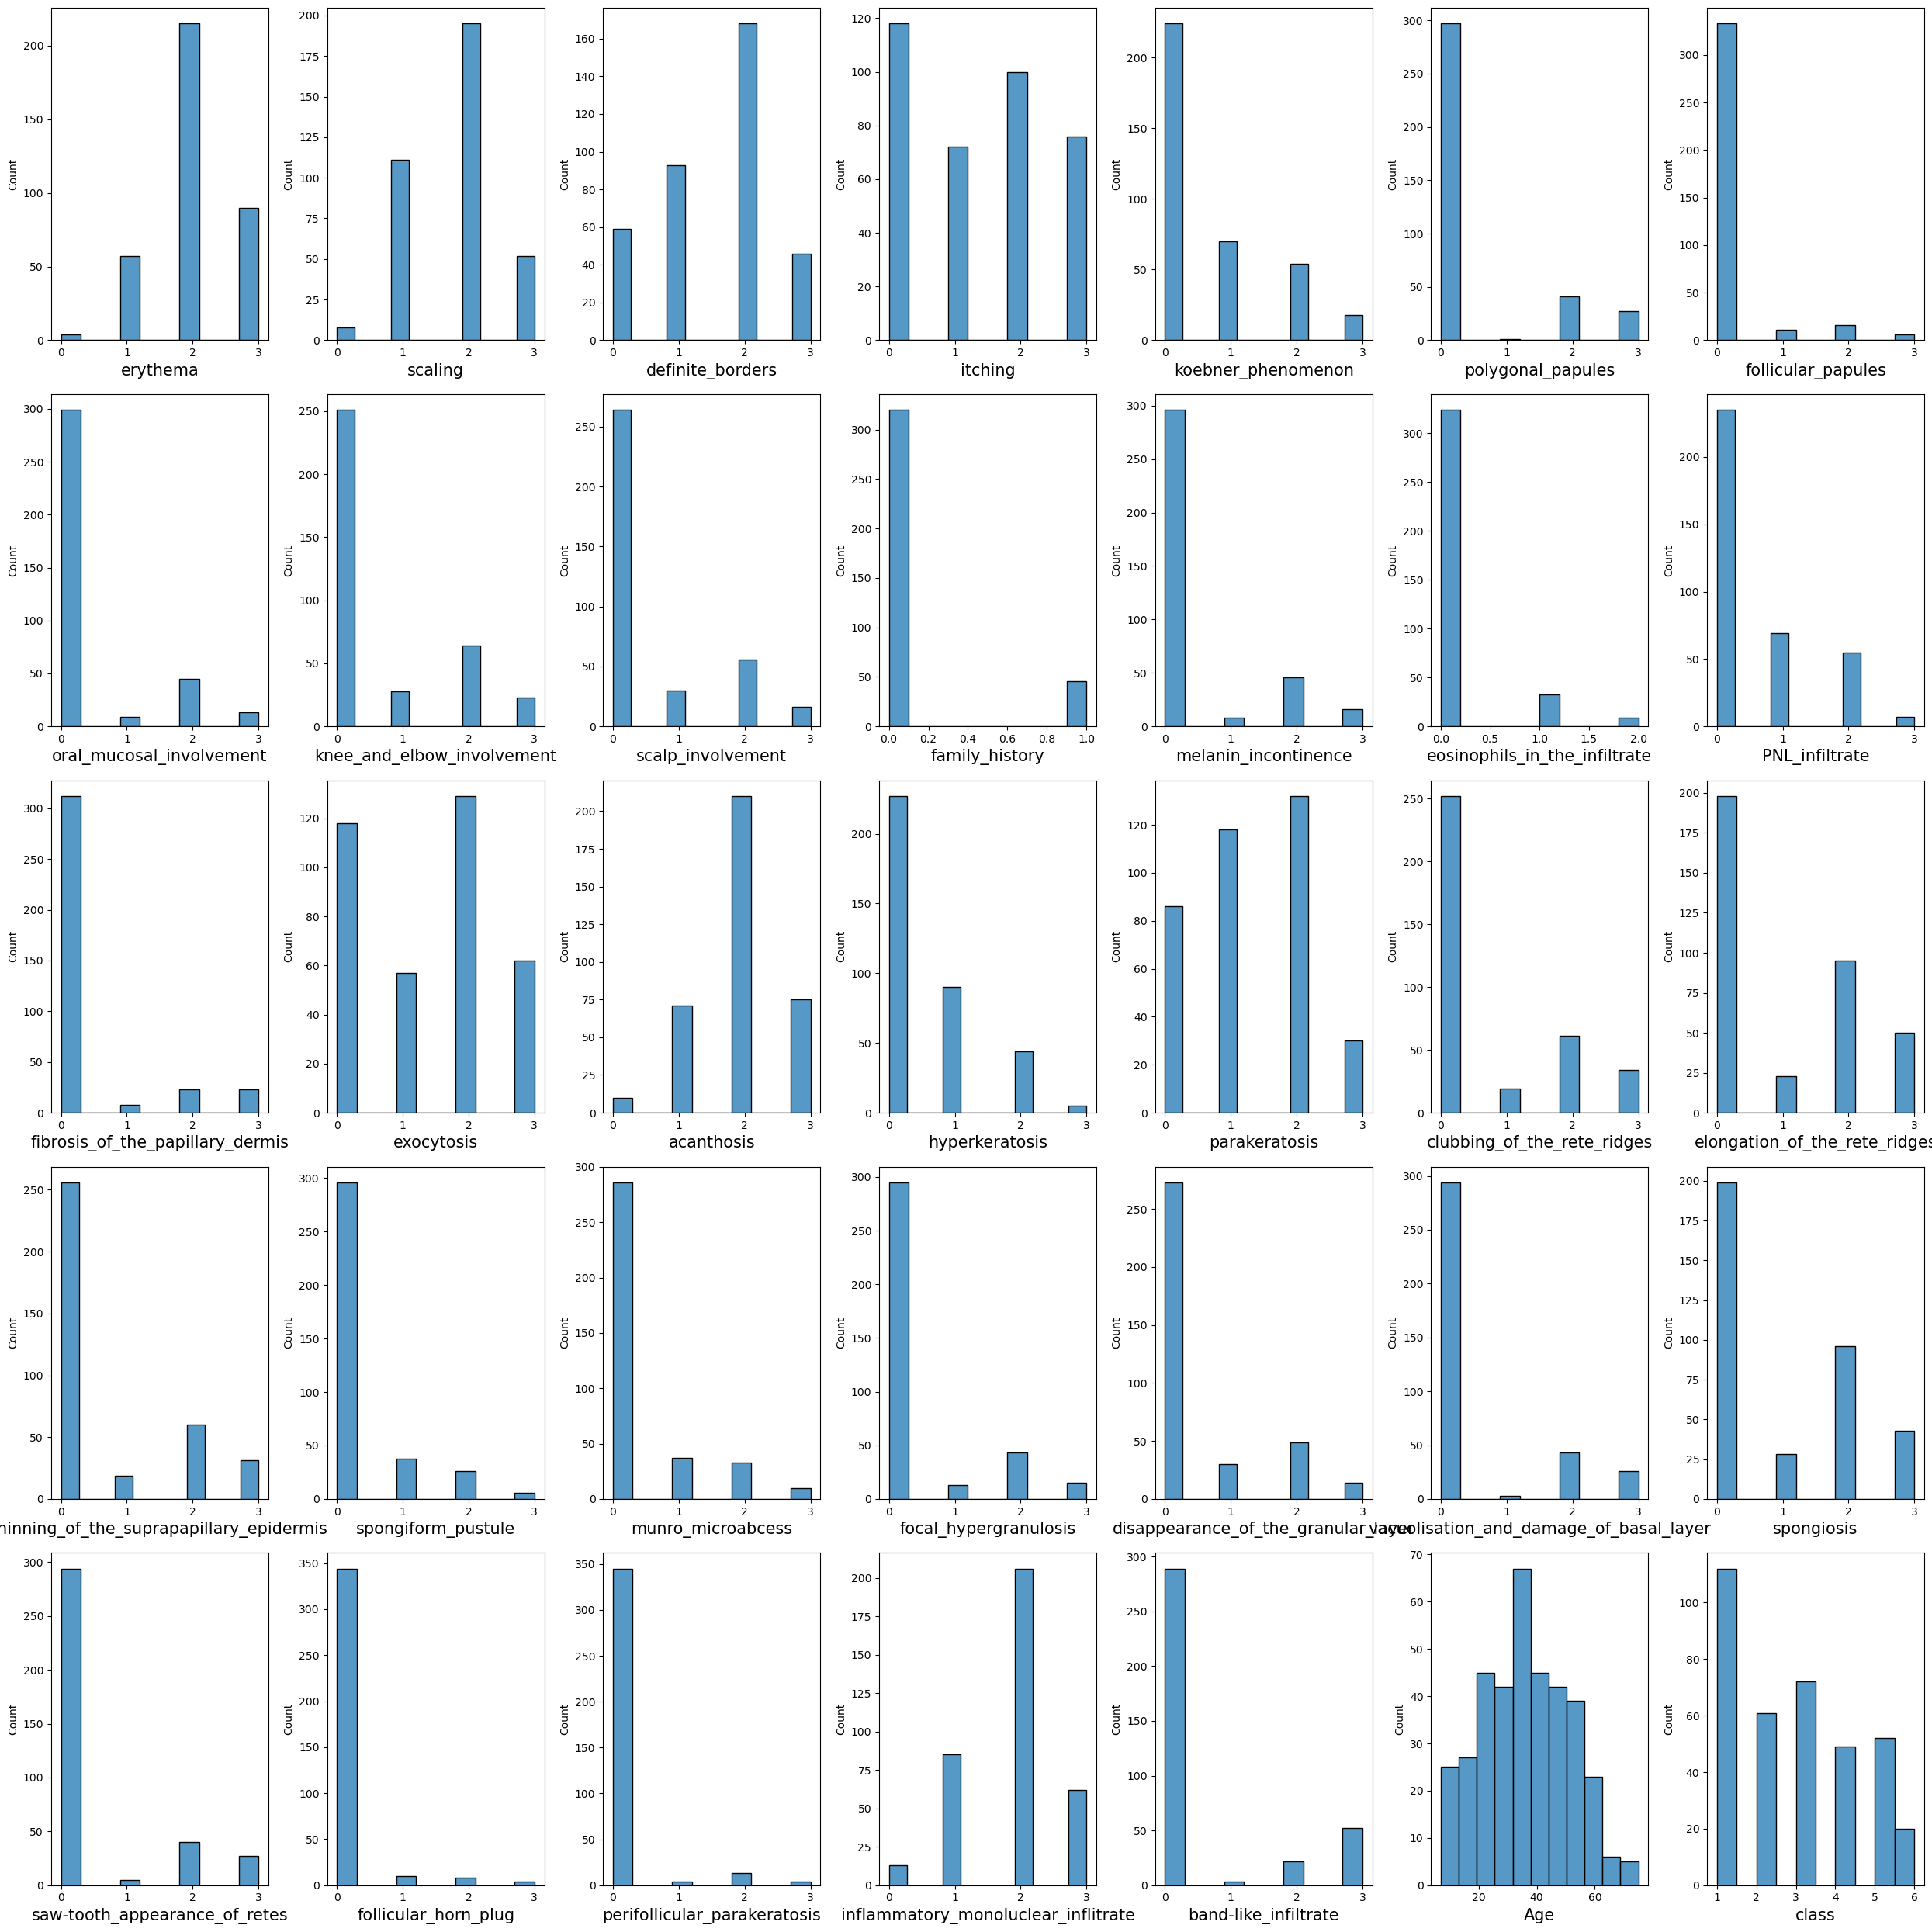

In [11]:
plotnum=1
plt.figure(figsize=(25,25))
for i in data.columns:
    plt.subplot(5,7,plotnum)
    sns.histplot(data[i])
    plt.xlabel(i,fontsize=15)
    plotnum=plotnum+1
plt.tight_layout()

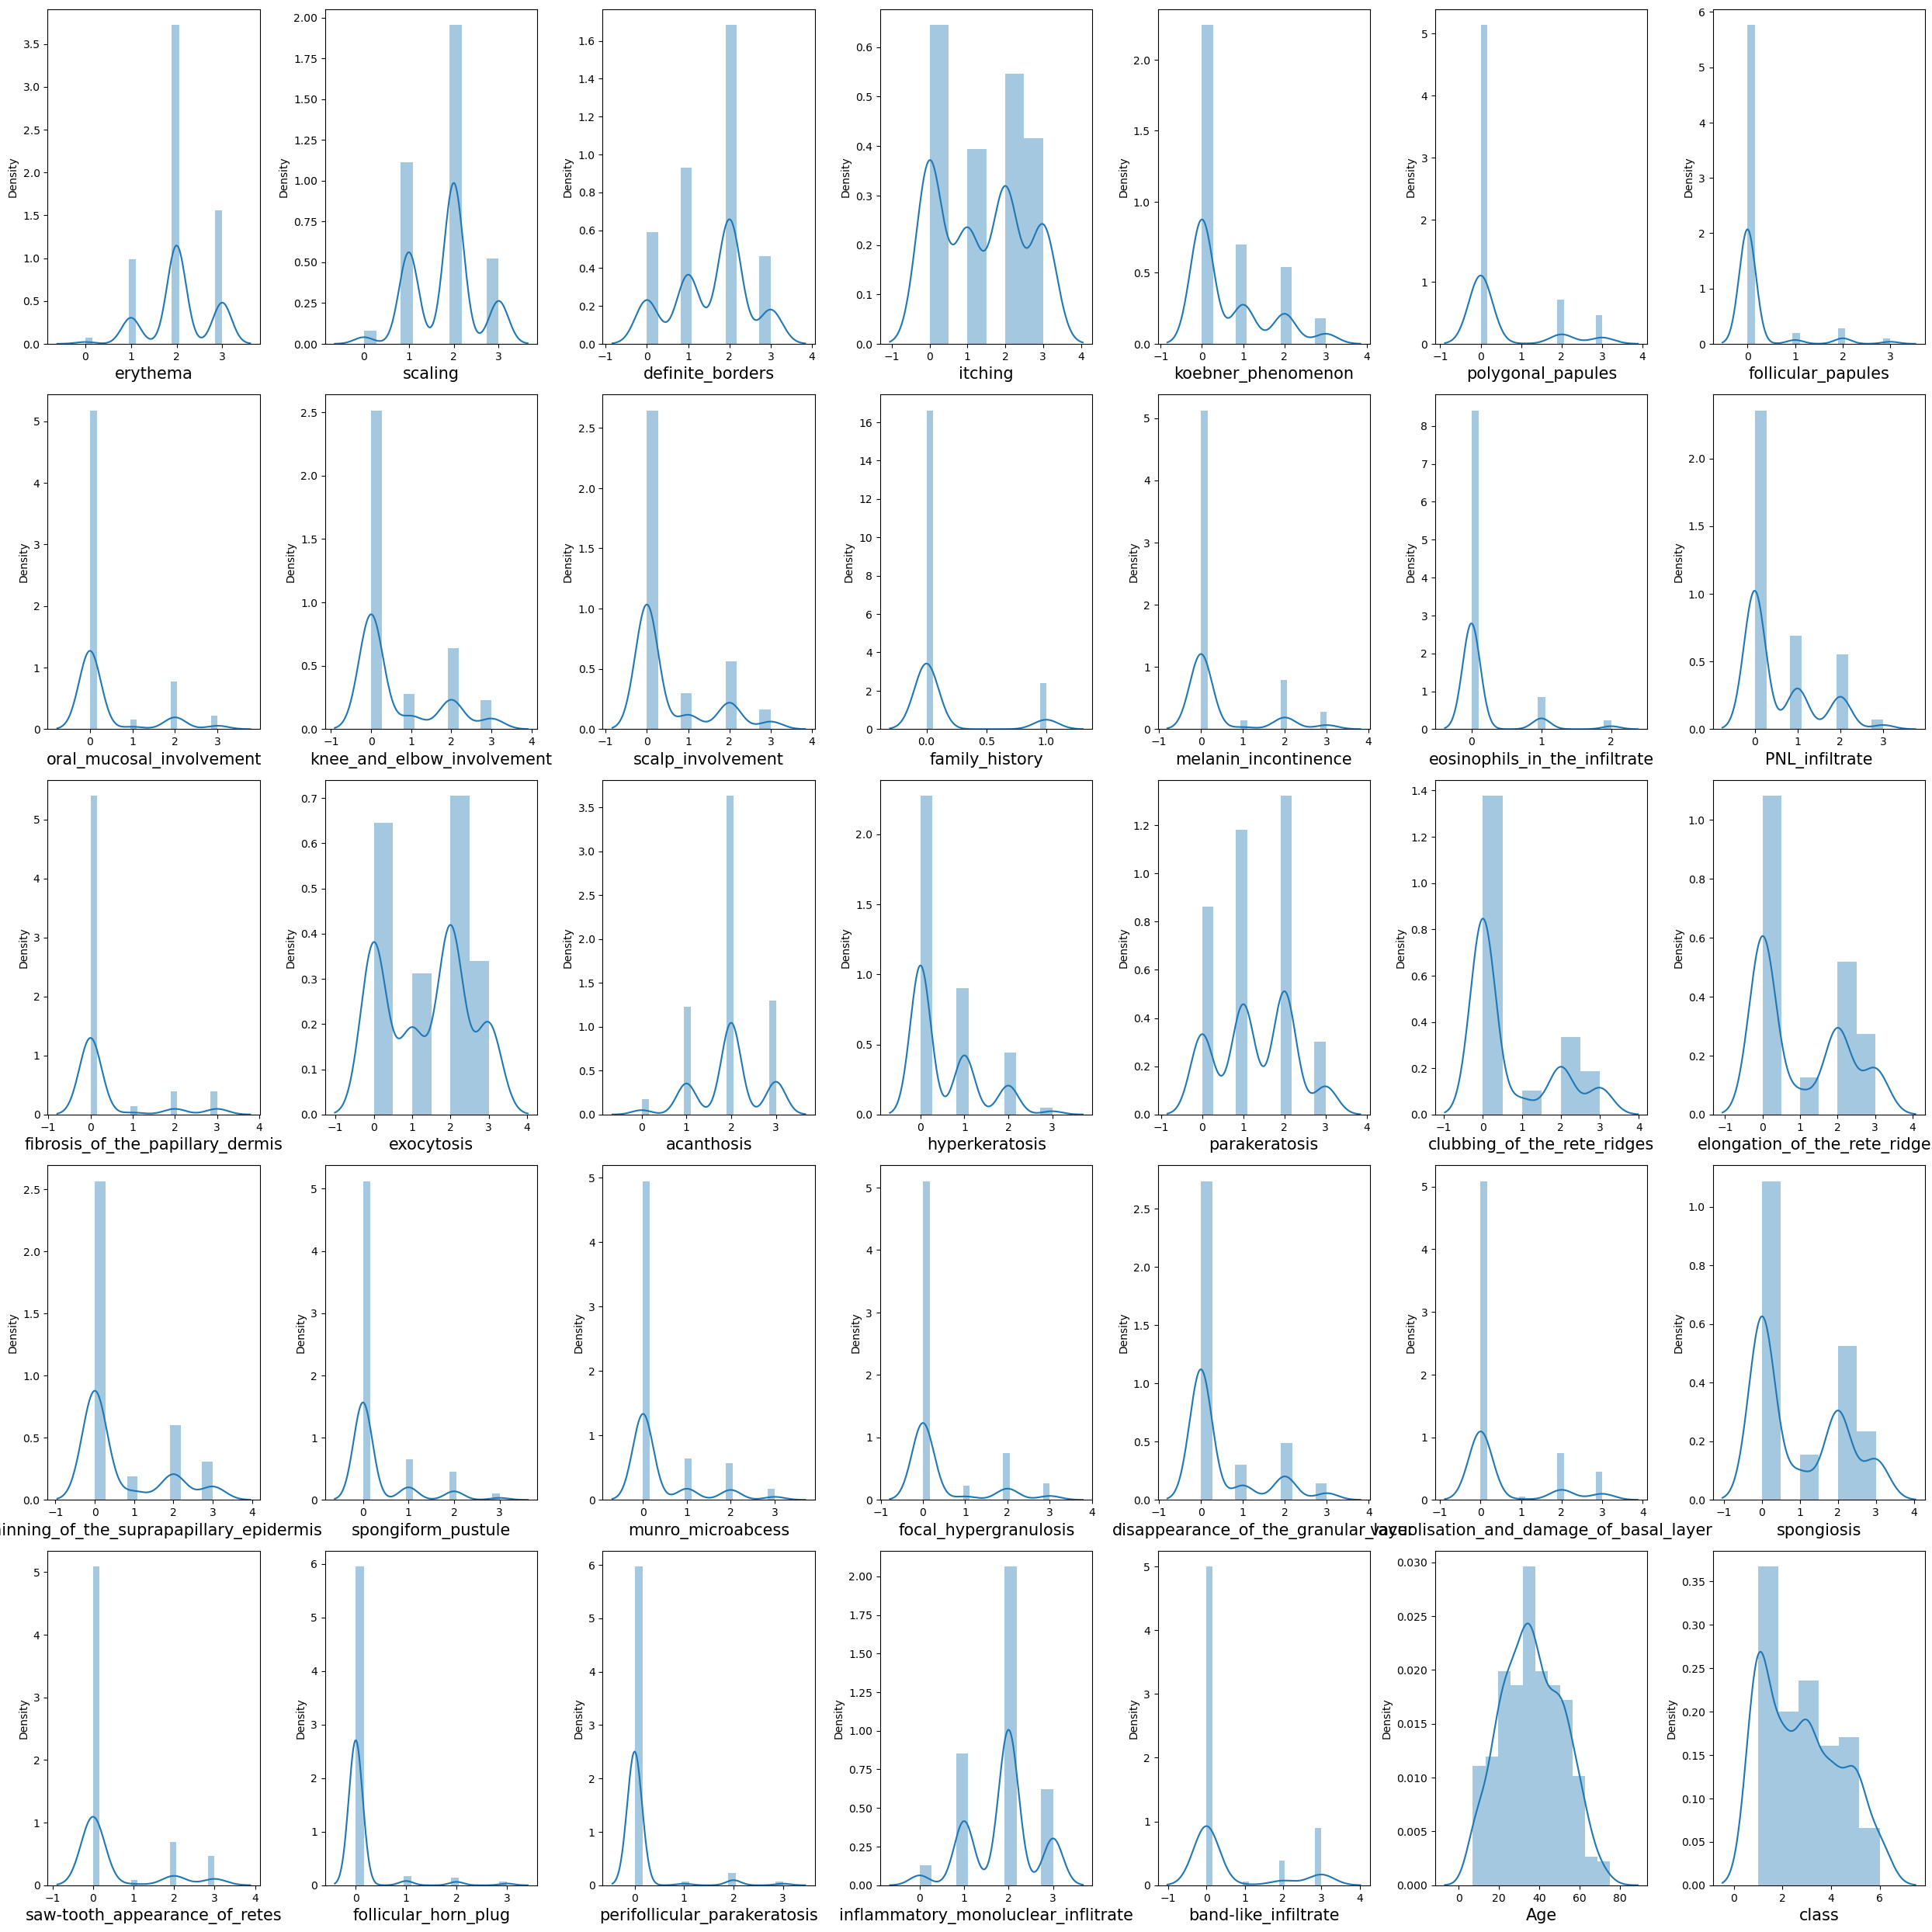

In [12]:
plotnum=1
plt.figure(figsize=(25,25))
for i in data.columns:
    plt.subplot(5,7,plotnum)
    sns.distplot(data[i])
    plt.xlabel(i,fontsize=15)
    plotnum=plotnum+1
plt.tight_layout()

### Insights from the data

- About 90% of the patients have 0 score for the symptoms
- About 70% of the patients are in range with 30 to 40 years

<Axes: xlabel='Age'>

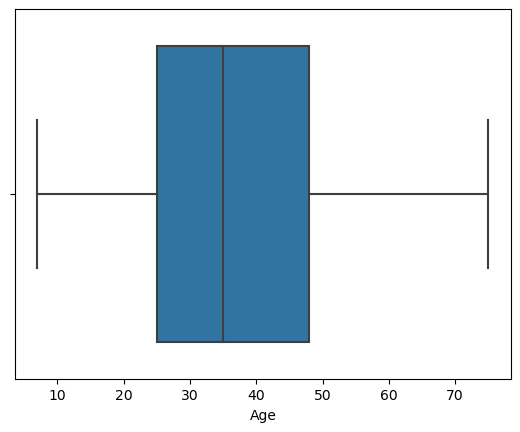

In [13]:
sns.boxplot(x='Age', data=data)

Text(0.5, 0, 'Age')

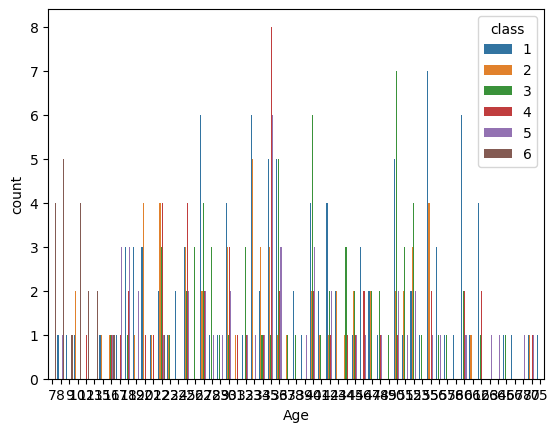

In [20]:
sns.countplot(x='Age', data=data,hue='class')
plt.xlabel('Age',fontsize=10)

DataFrame Head:


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3


DataFrame Tail:


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(366, 35)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_invol

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
erythema,366,2.068,2,0.665,0,2,2,2,3,-0.300434,0.028509
scaling,366,1.795,2,0.702,0,1,2,2,3,-0.074868,-0.307527
definite_borders,366,1.549,2,0.908,0,1,2,2,3,-0.289590,-0.735896
itching,366,1.366,1,1.138,0,0,1,2,3,0.097802,-1.412679
koebner_phenomenon,366,0.634,0,0.908,0,0,0,1,3,1.181827,0.191367
polygonal_papules,366,0.448,0,0.957,0,0,0,0,3,1.799235,1.562579
follicular_papules,366,0.167,0,0.571,0,0,0,0,3,3.542772,11.850758
oral_mucosal_involvement,366,0.377,0,0.834,0,0,0,0,3,1.952703,2.305201
knee_and_elbow_involvement,366,0.615,0,0.983,0,0,0,1,3,1.229140,-0.008582
scalp_involvement,366,0.519,0,0.906,0,0,0,1,3,1.449955,0.659936


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



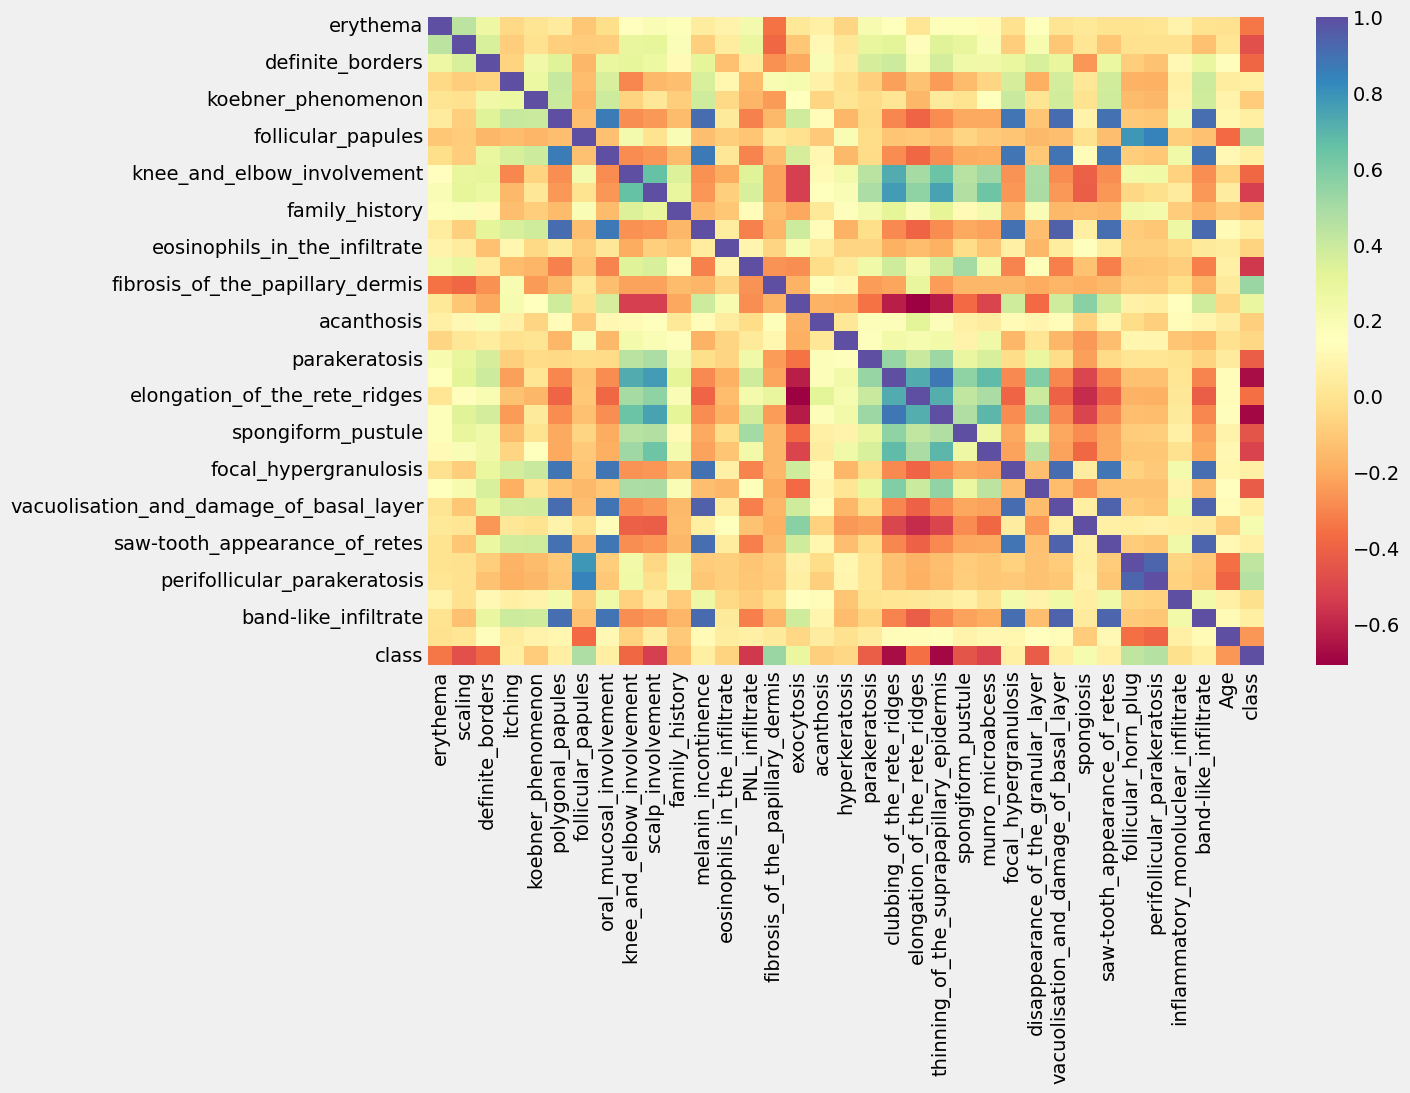

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



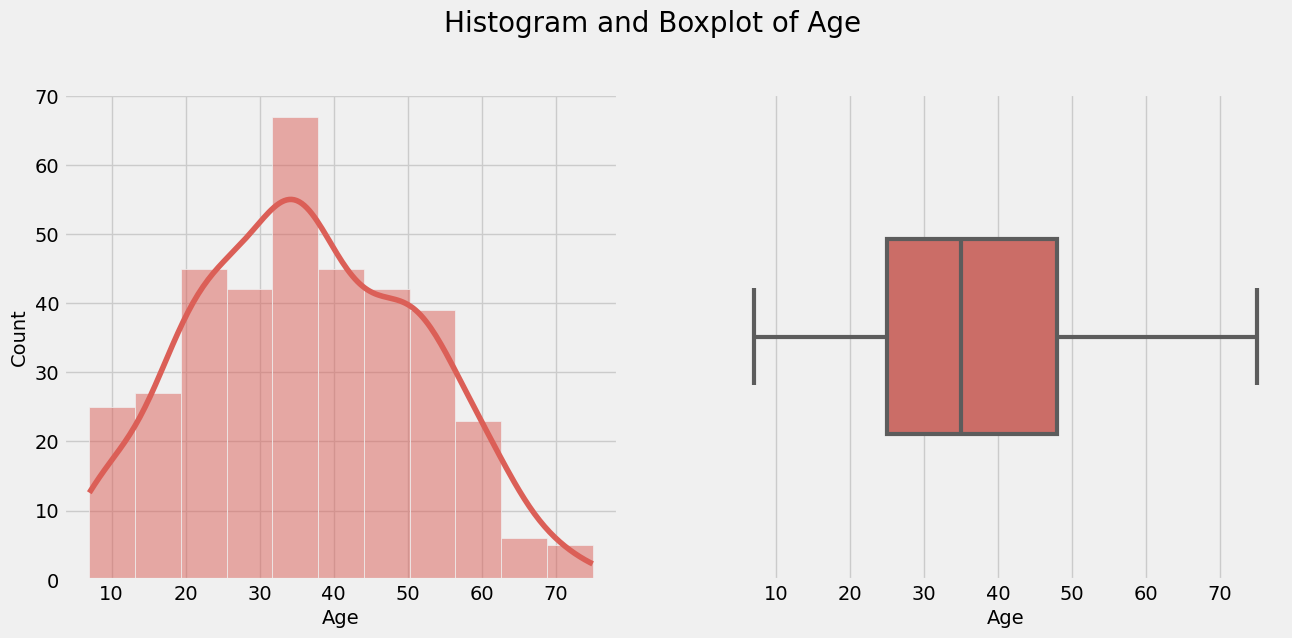

----------------------------------------------------------------------------------------------------
Countplot(s):



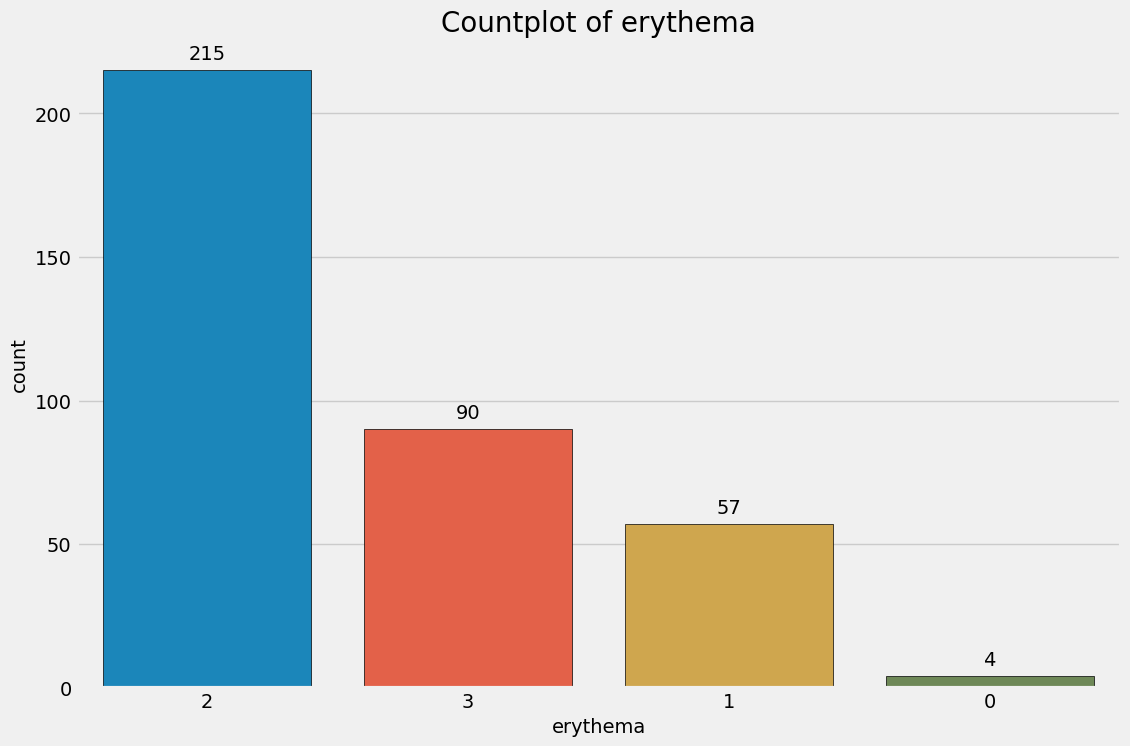

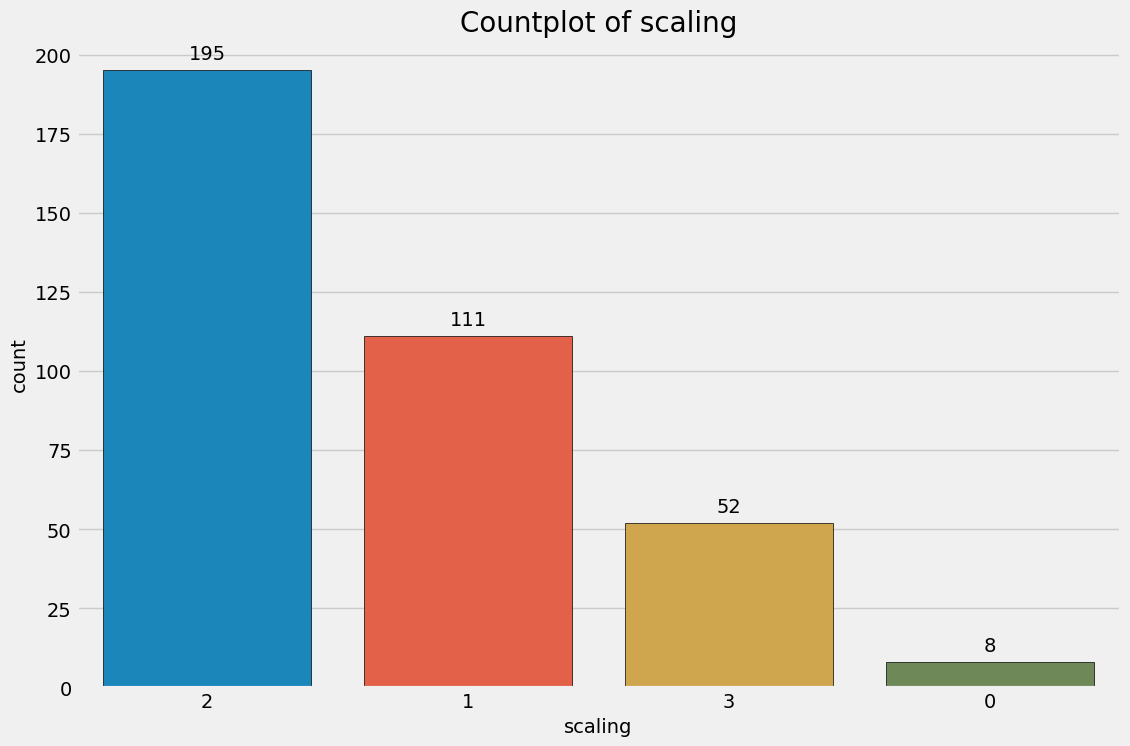

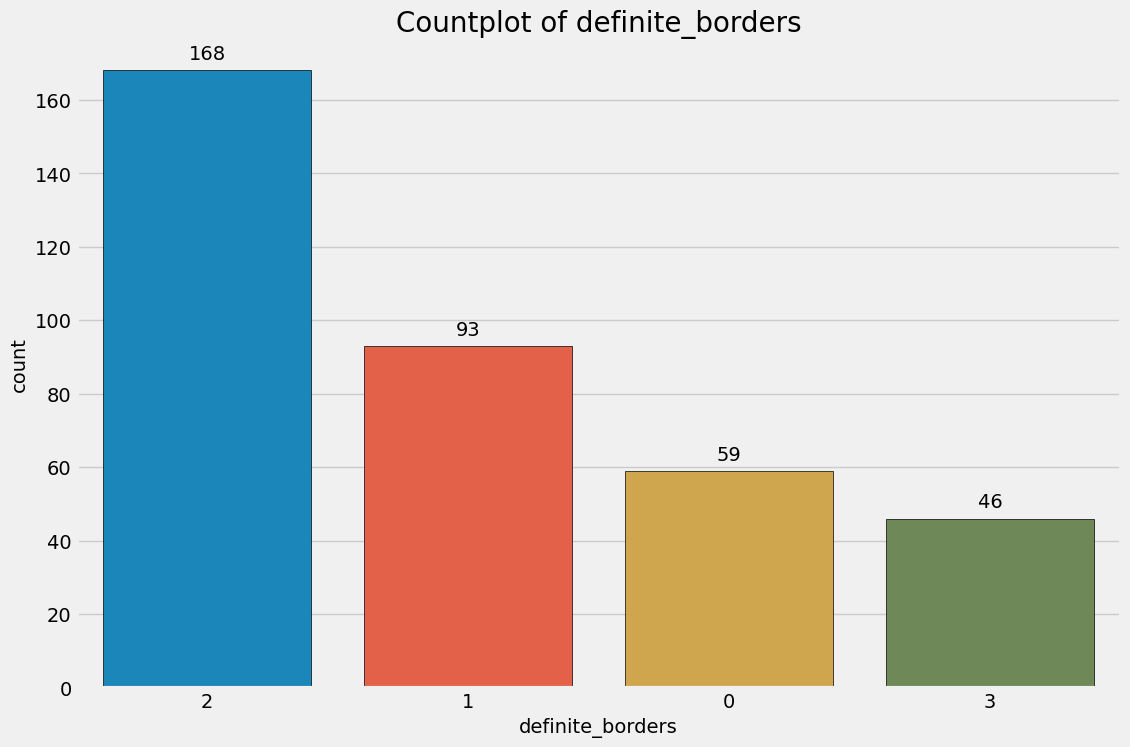

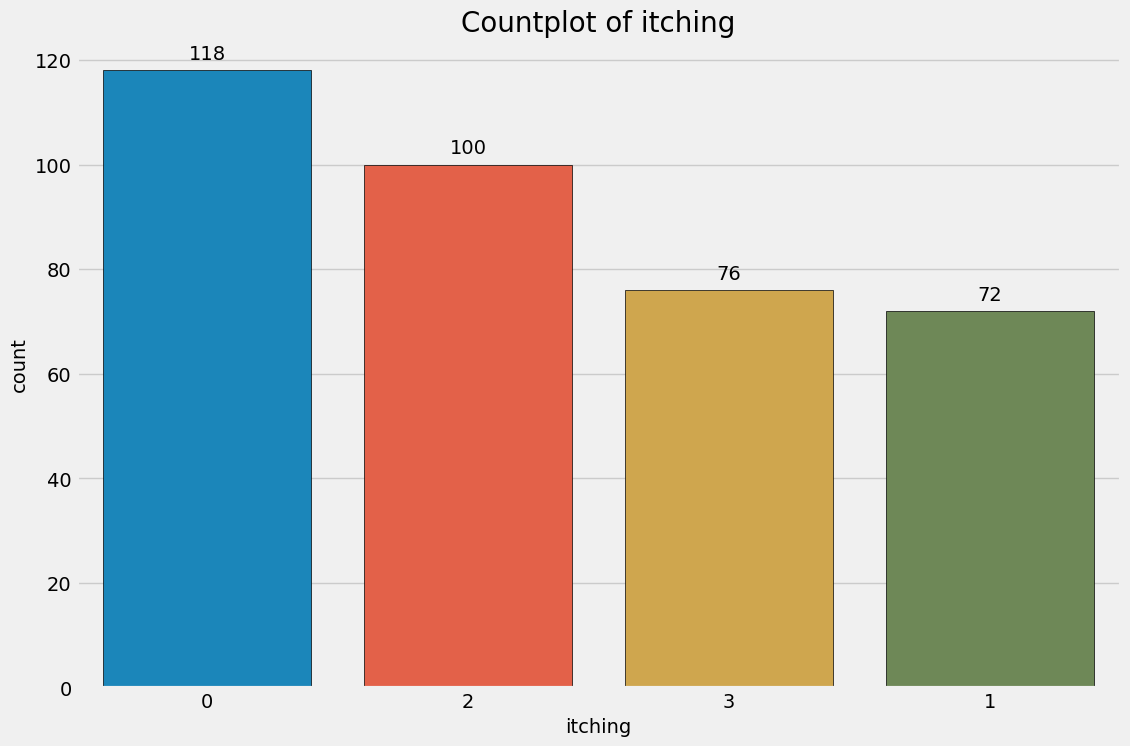

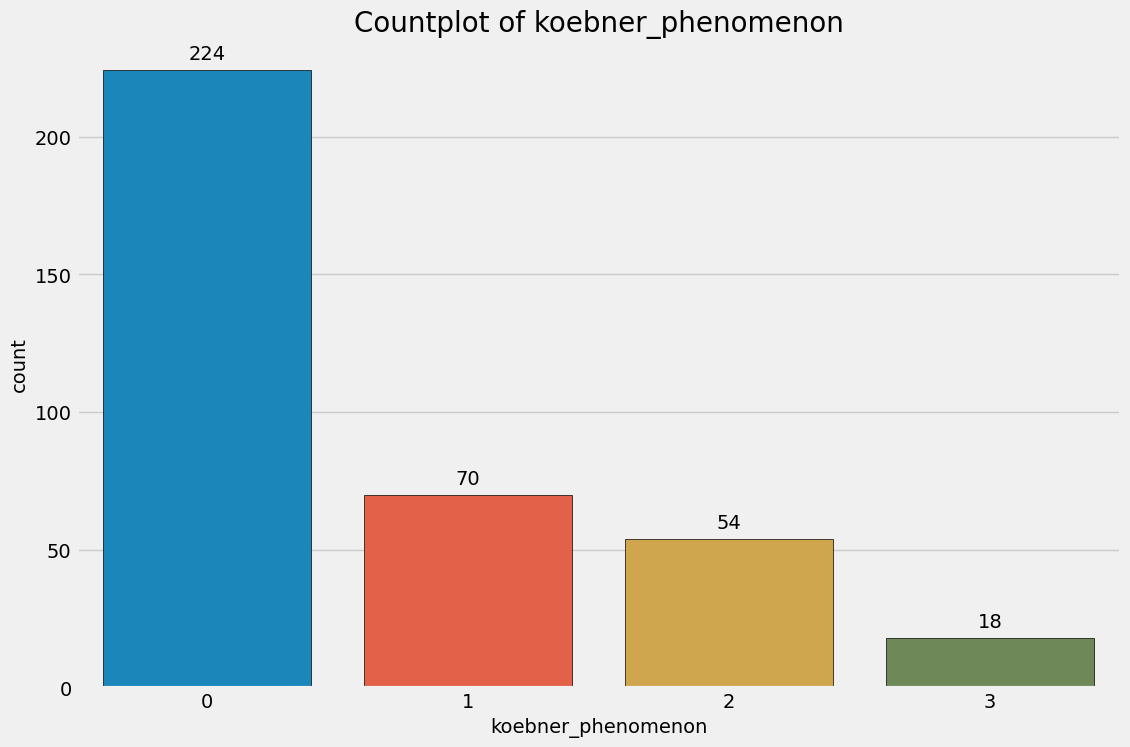

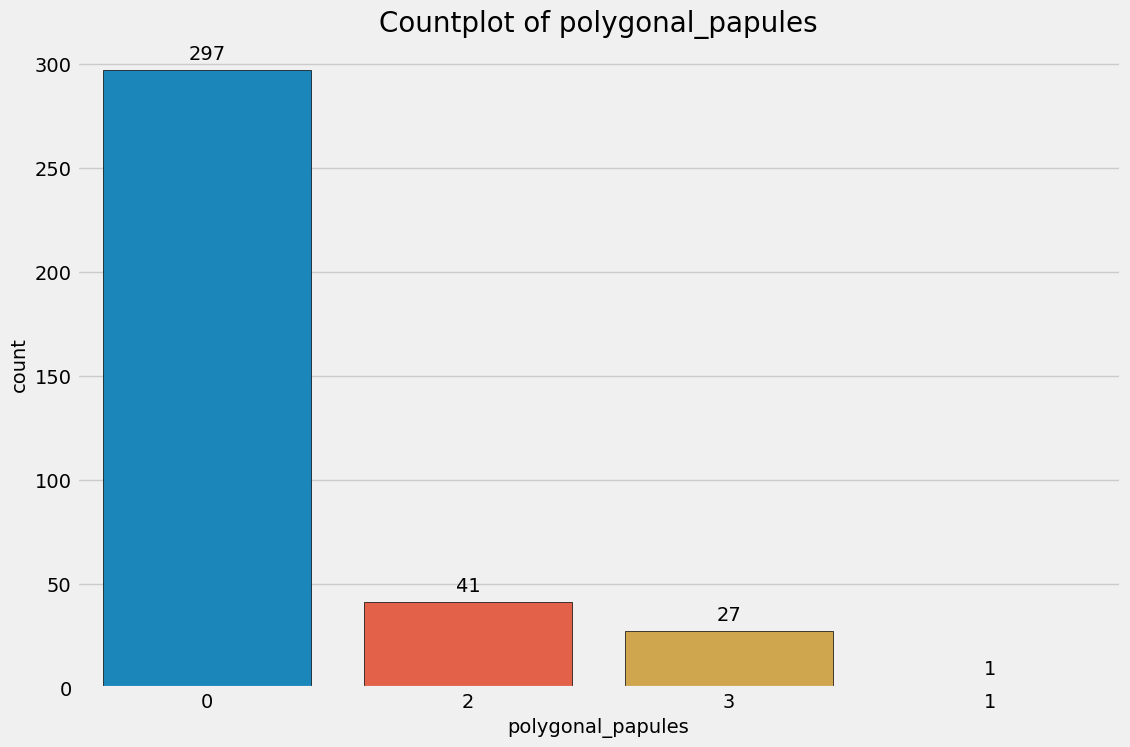

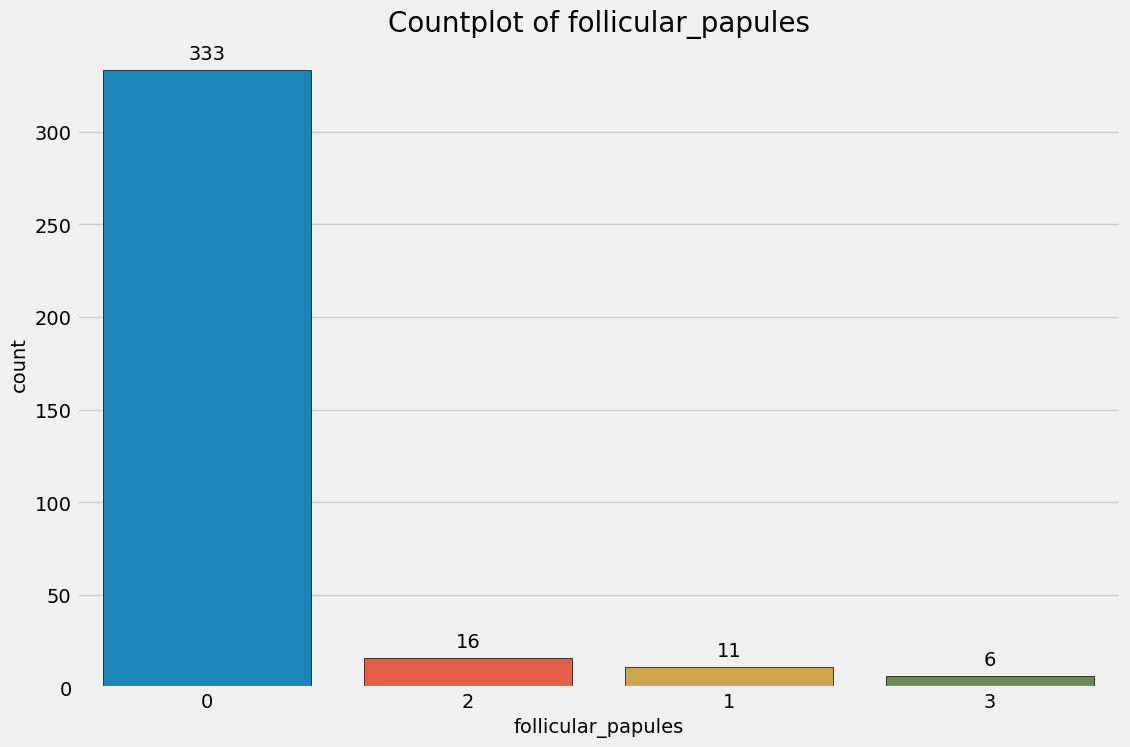

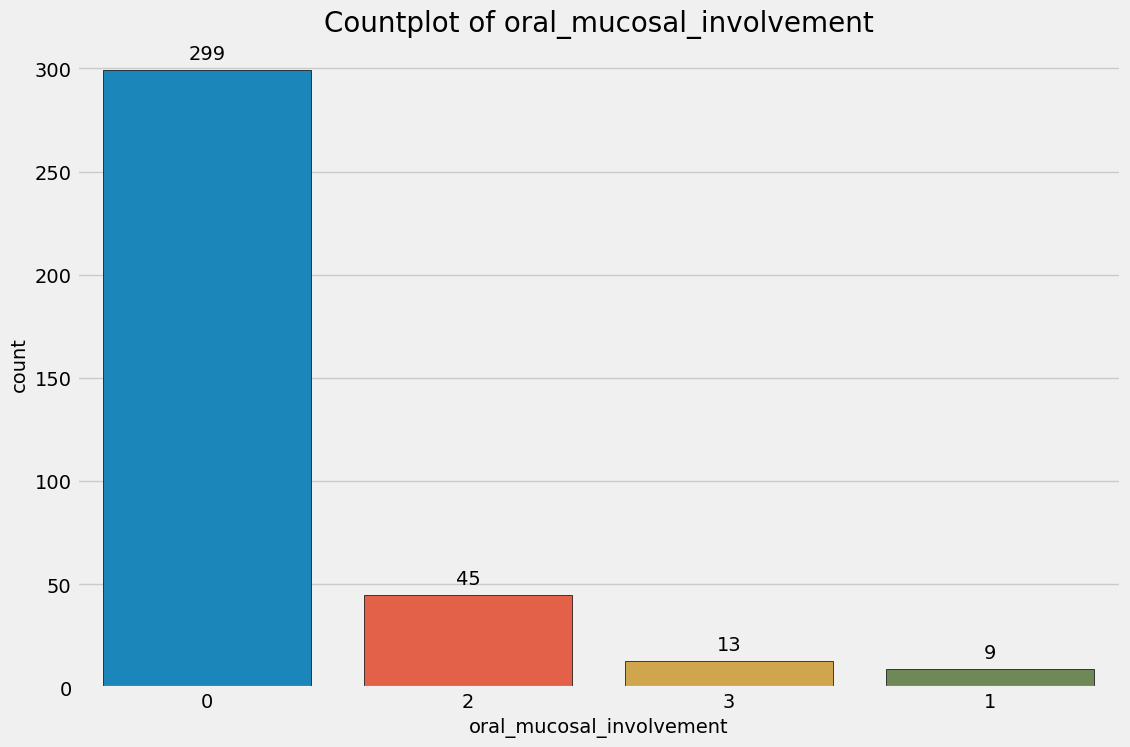

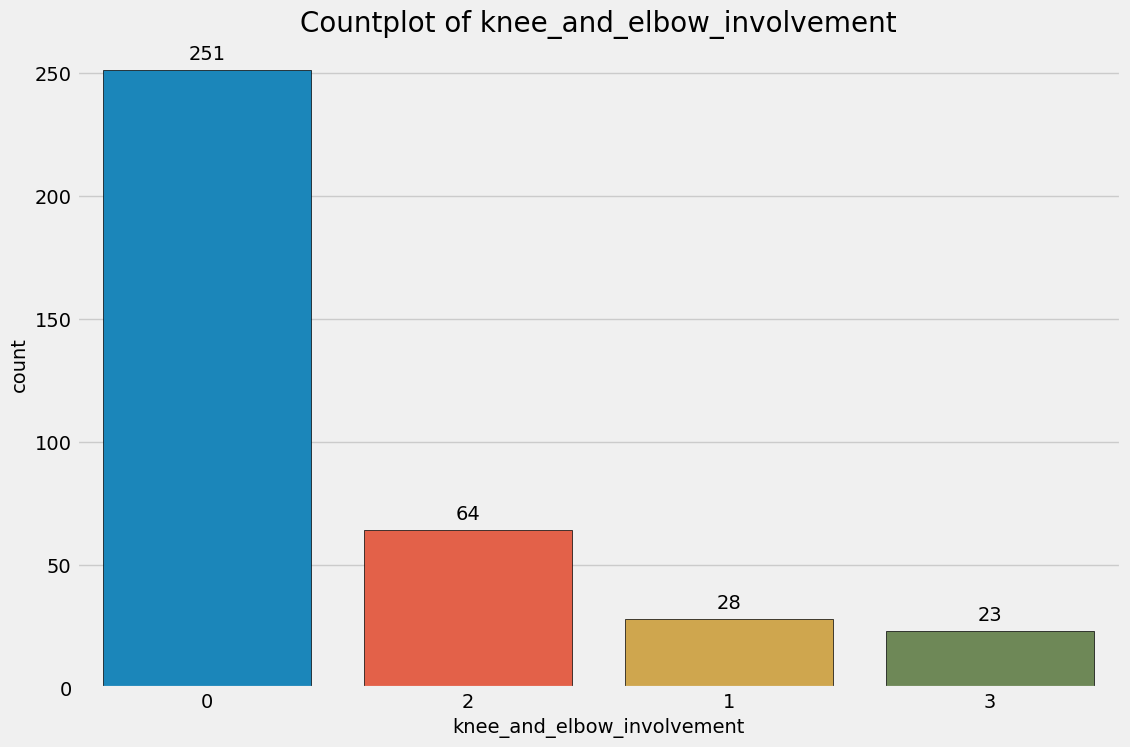

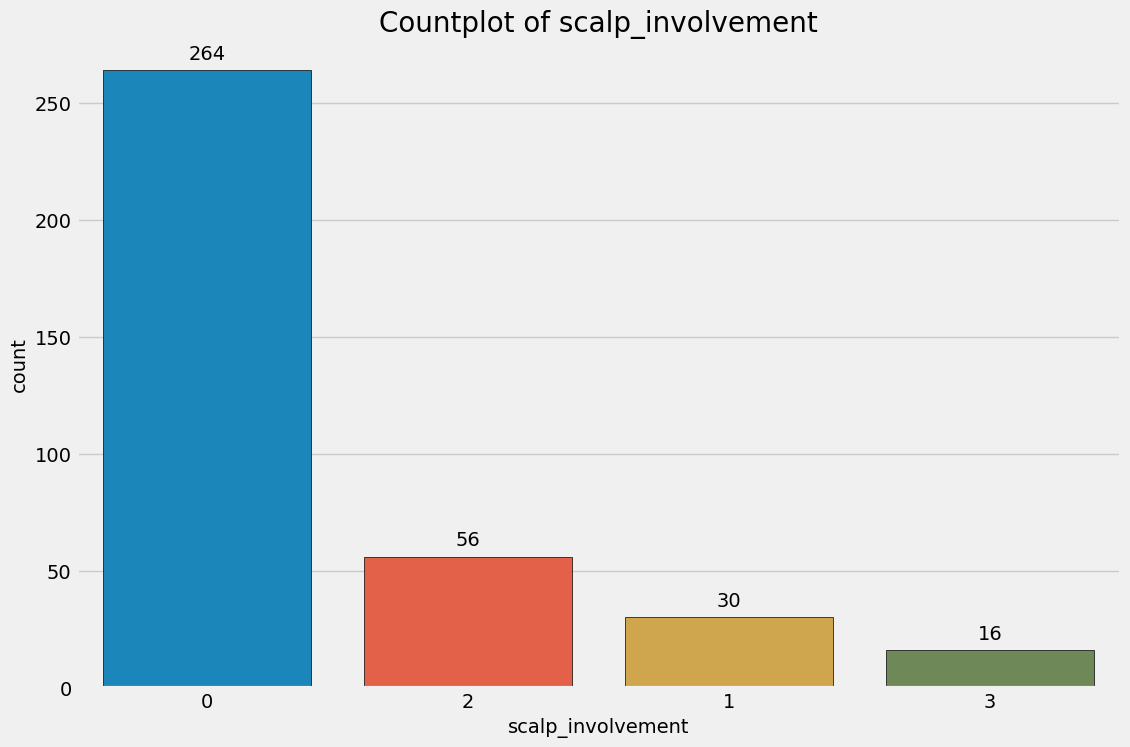

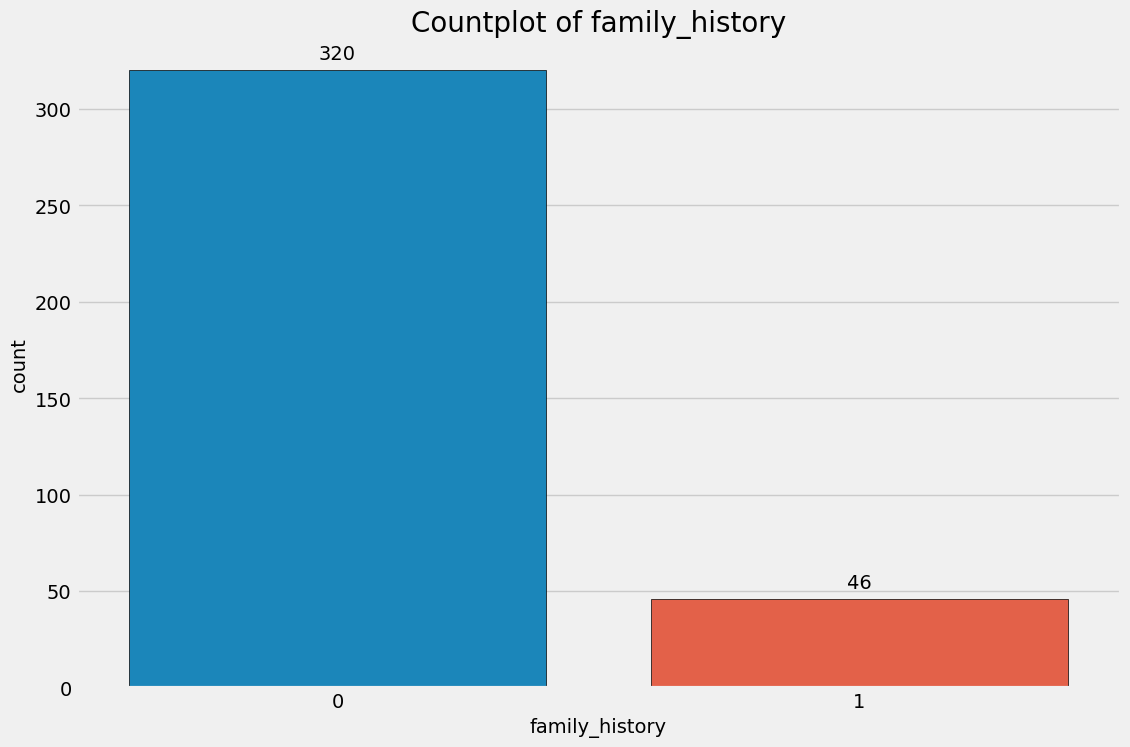

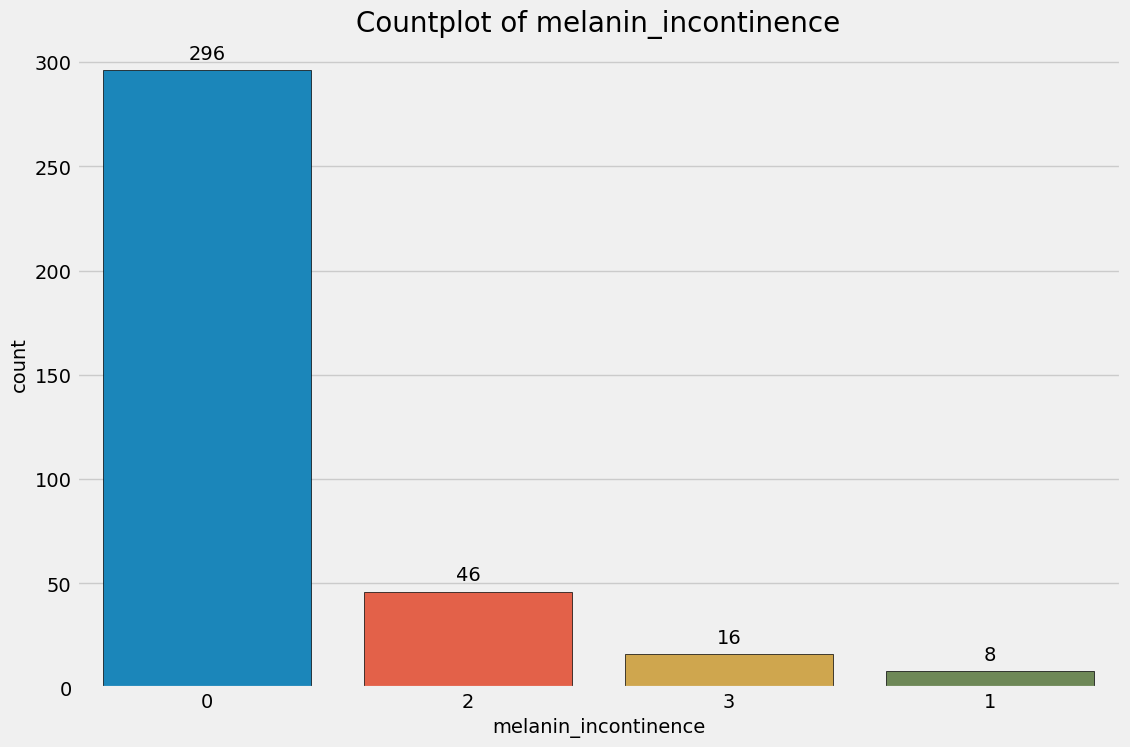

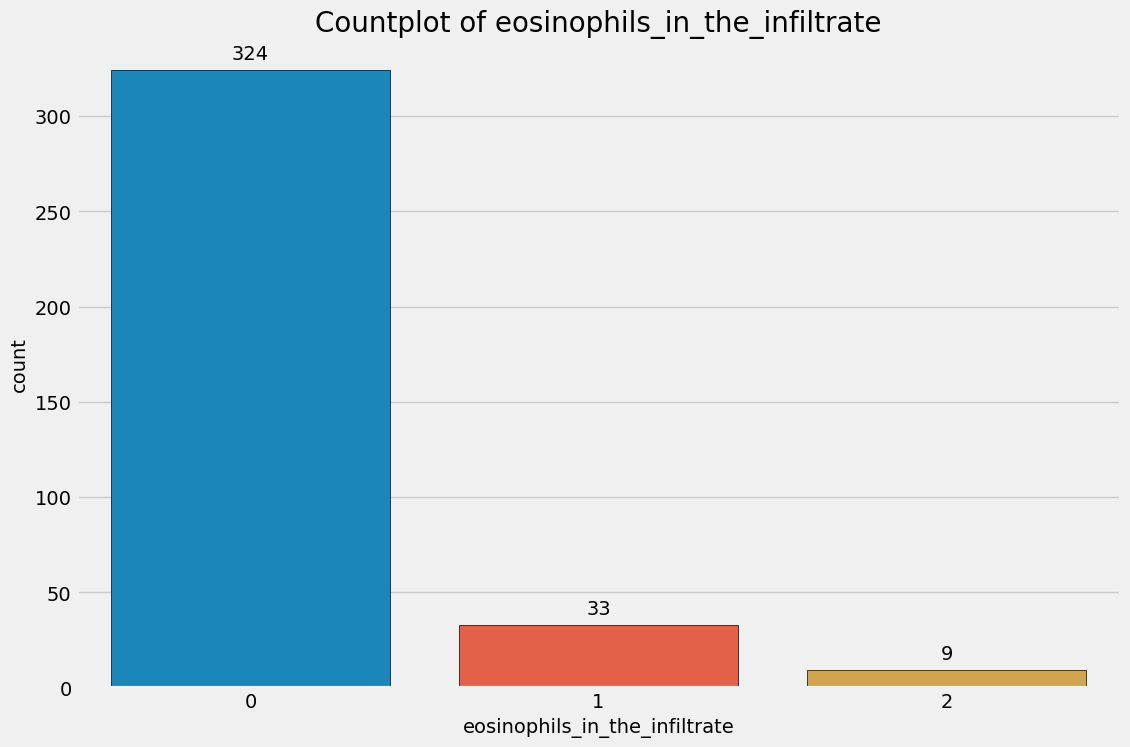

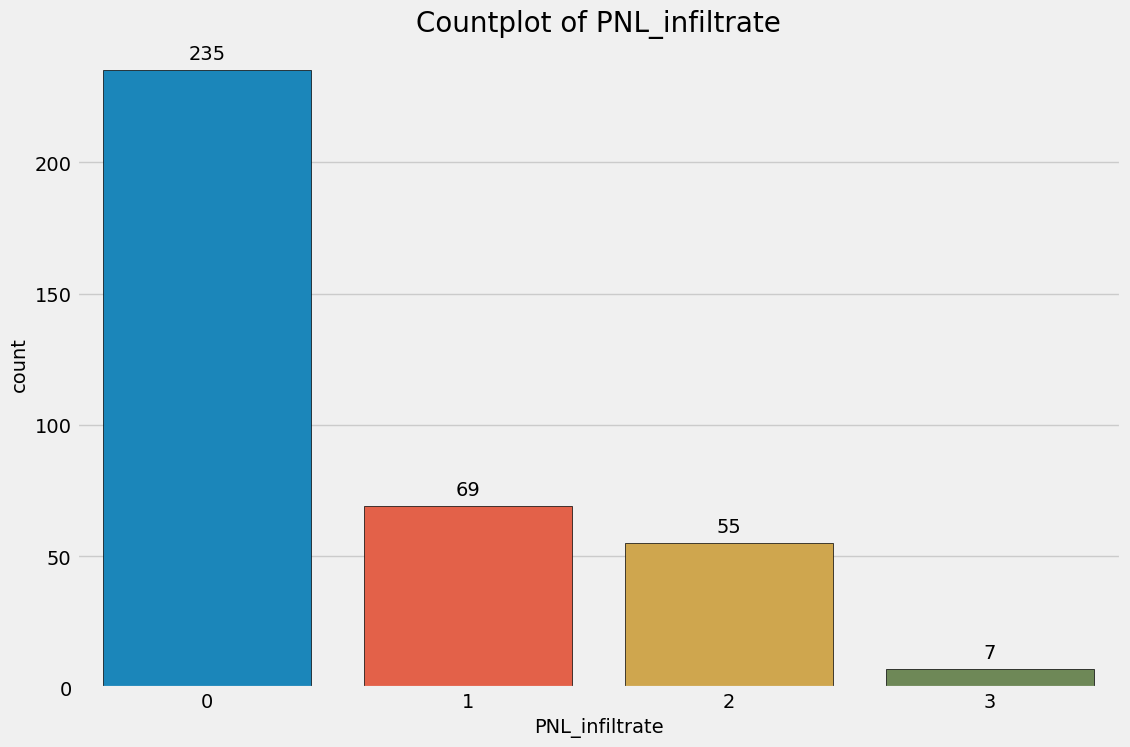

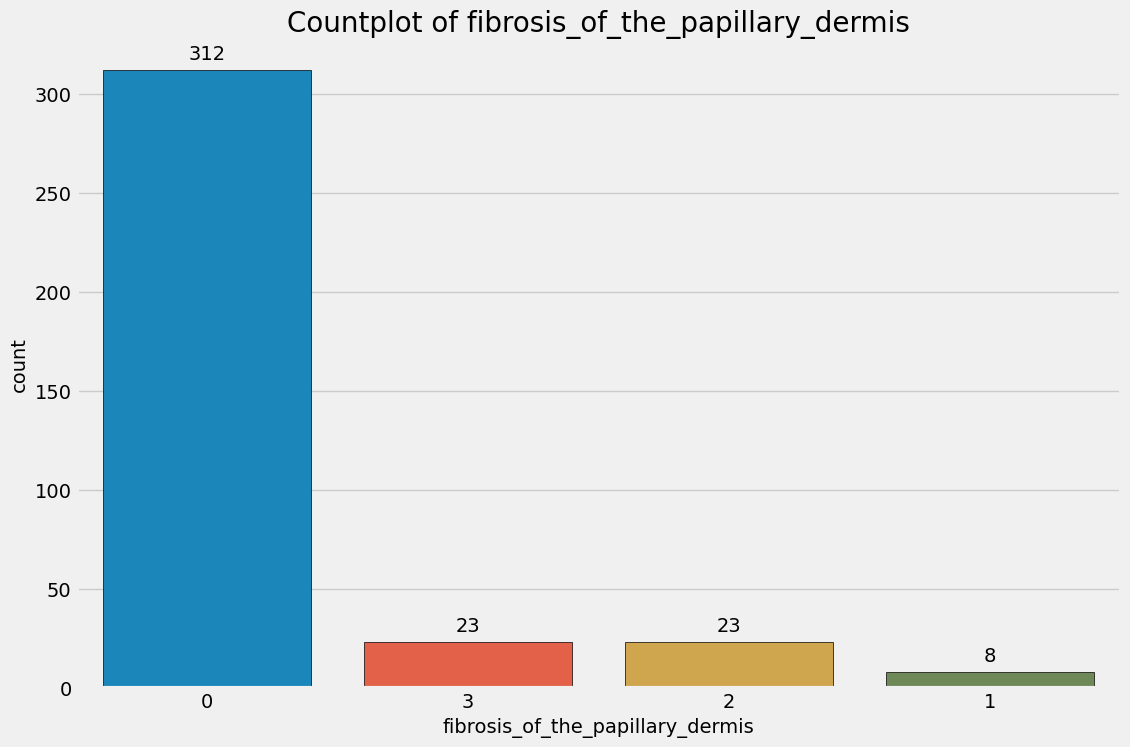

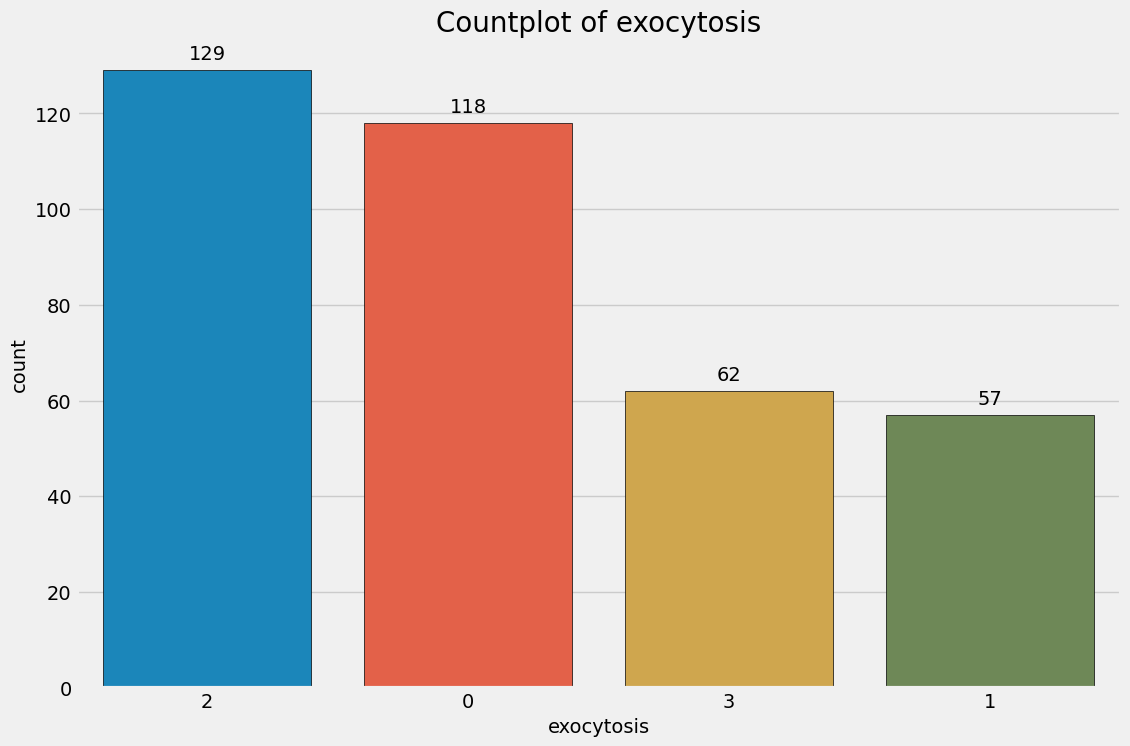

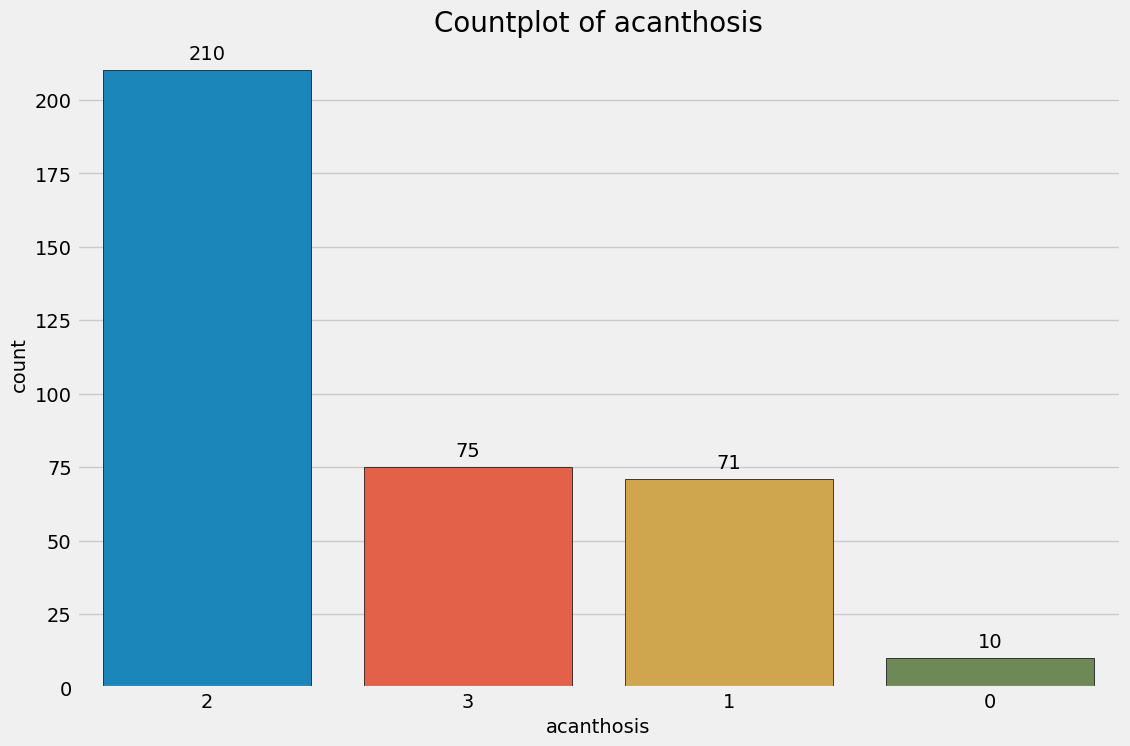

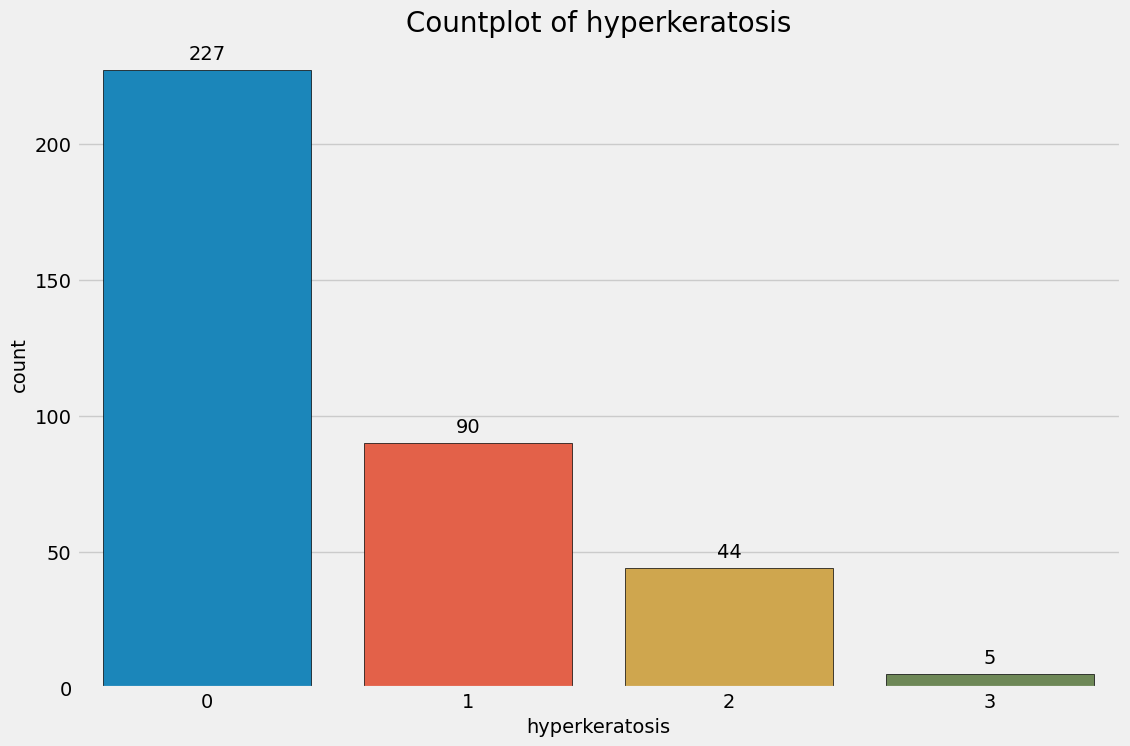

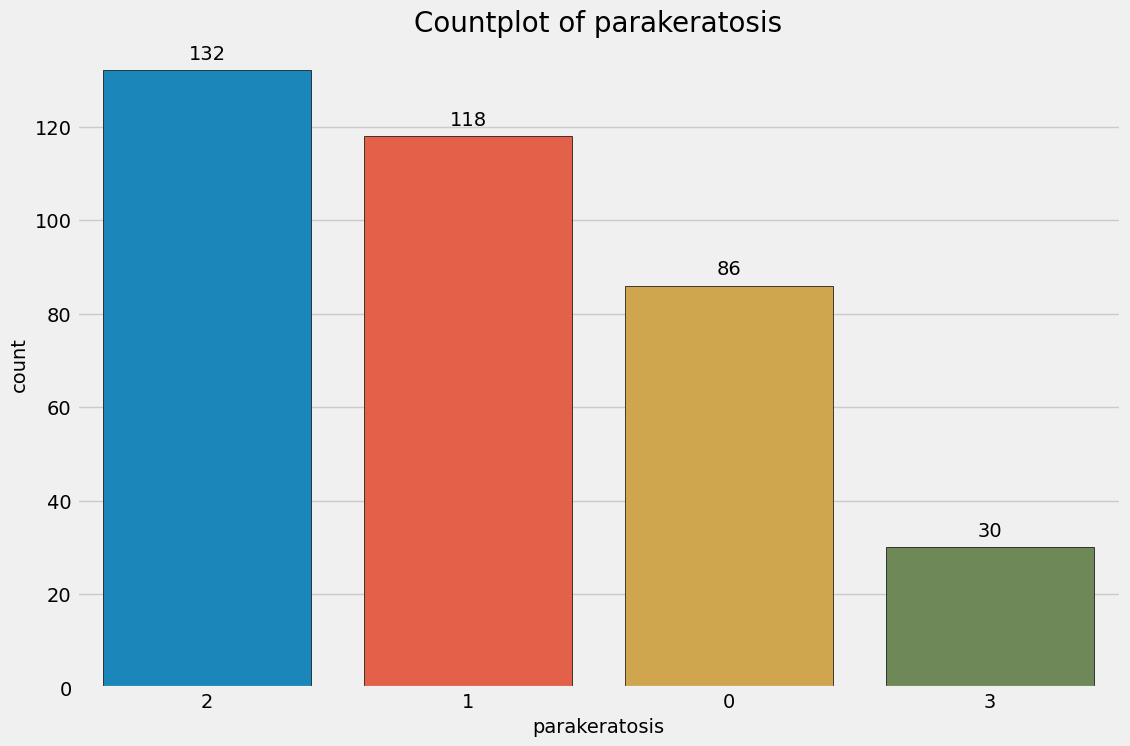

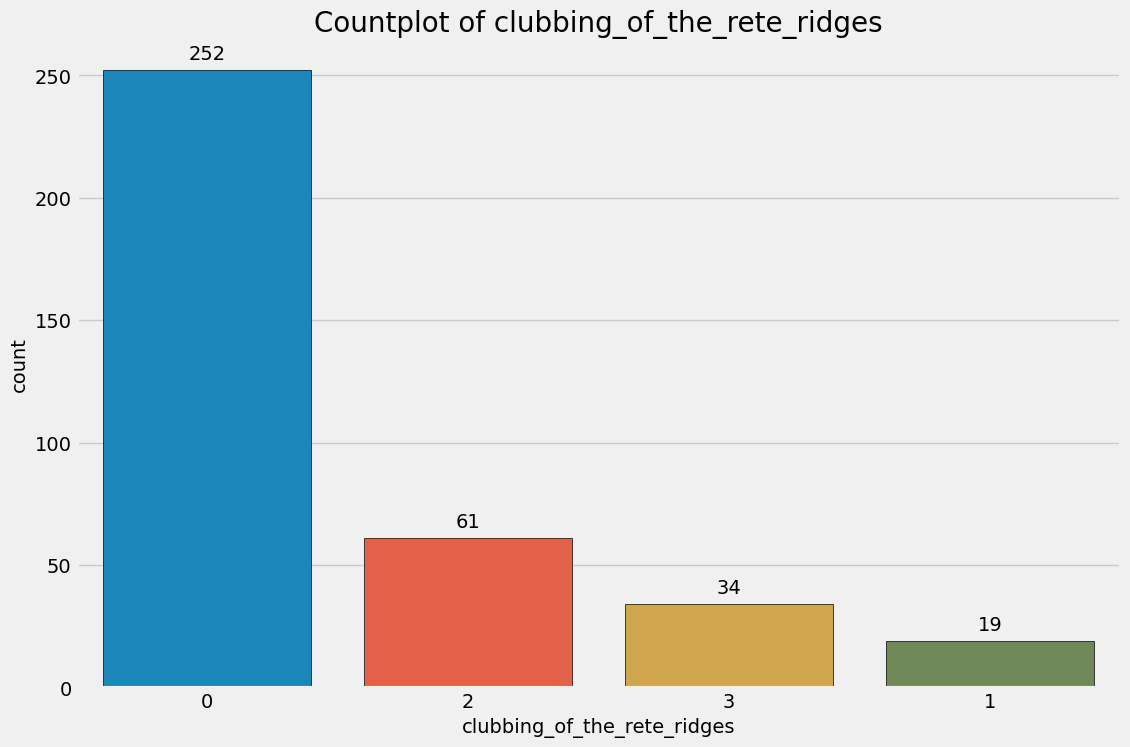

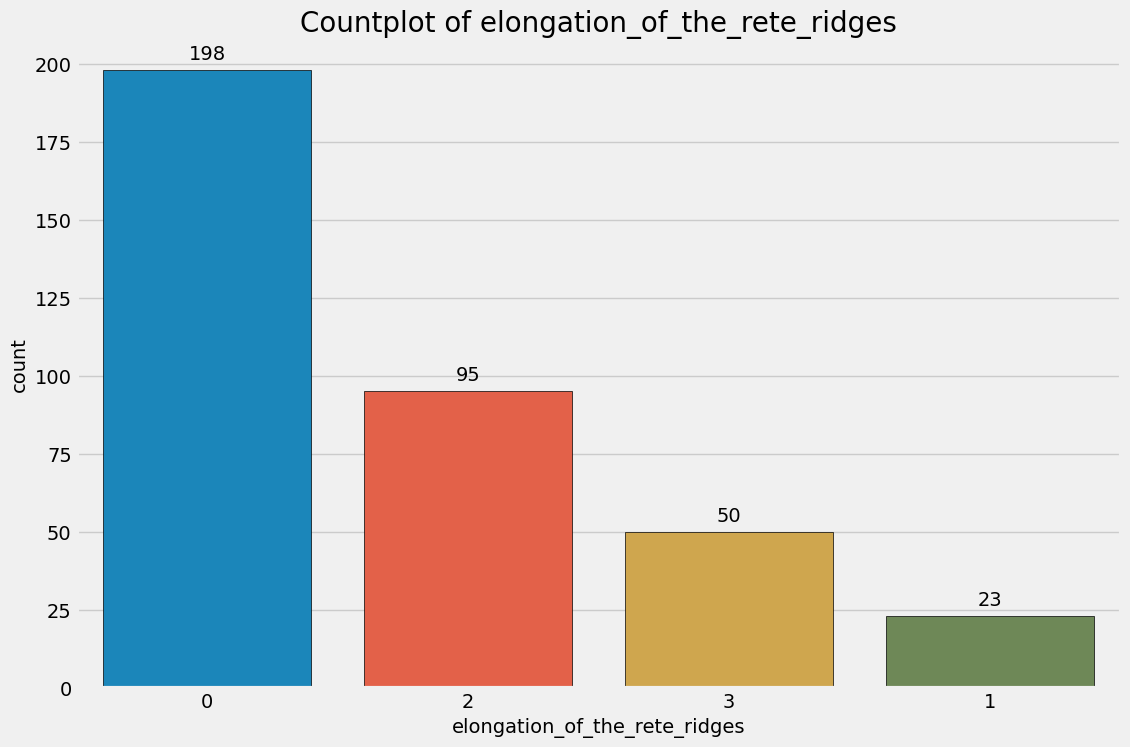

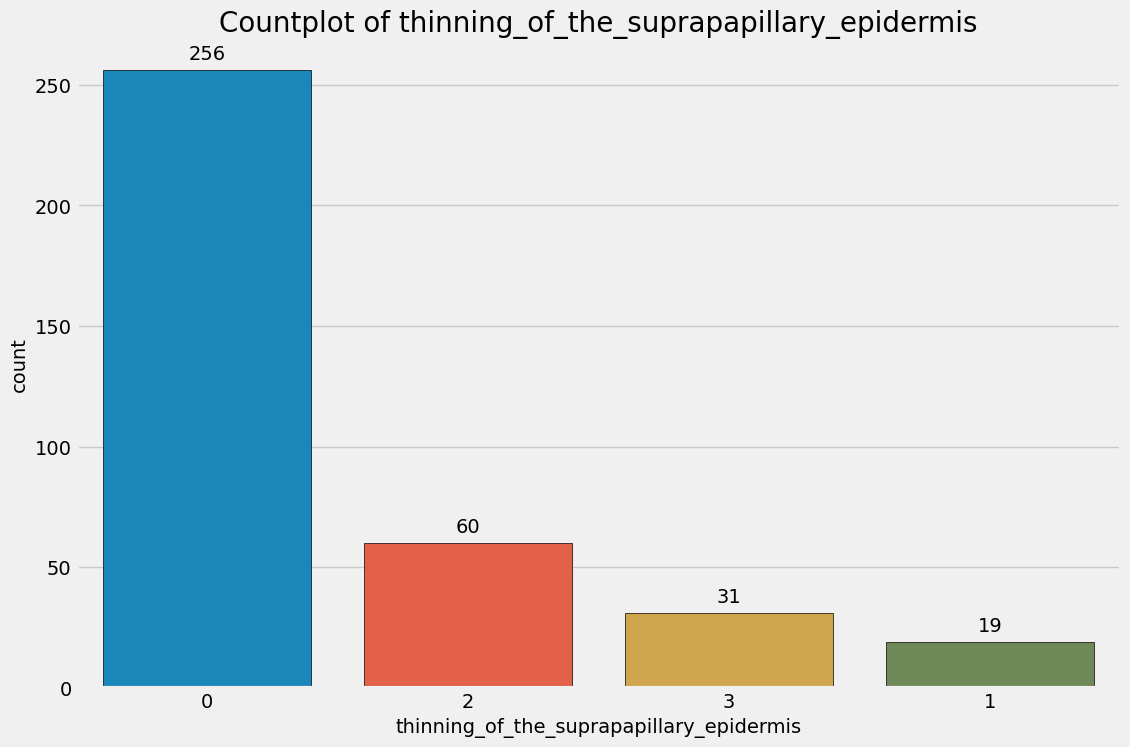

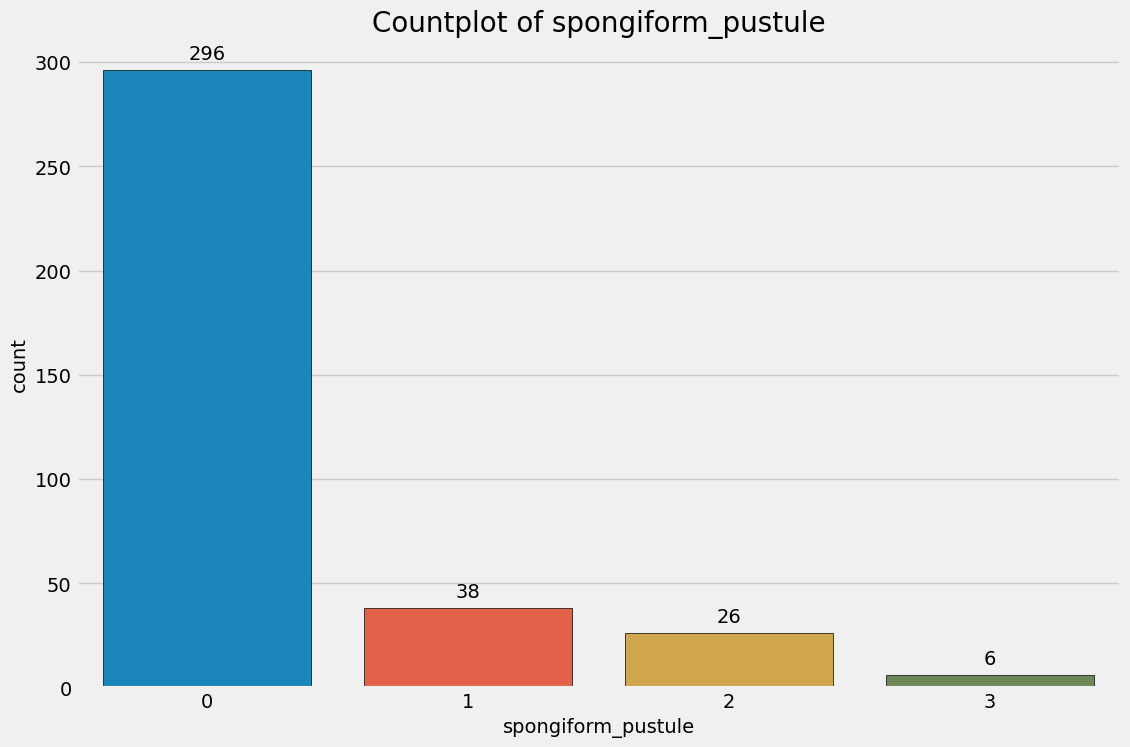

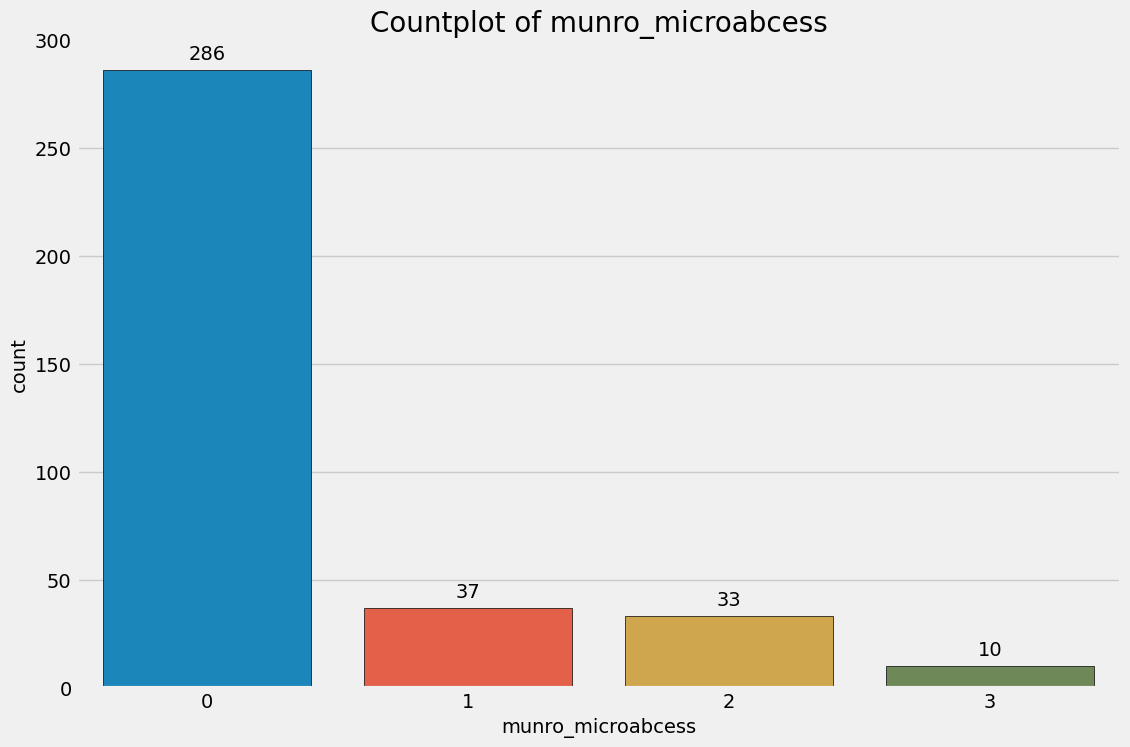

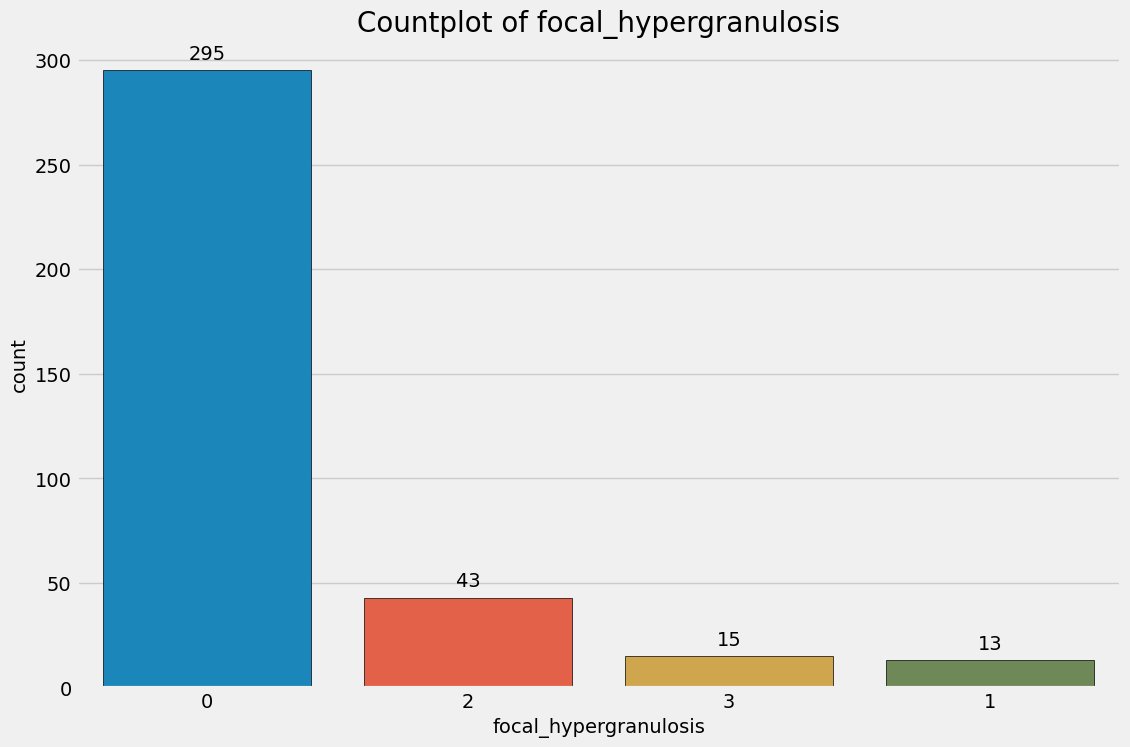

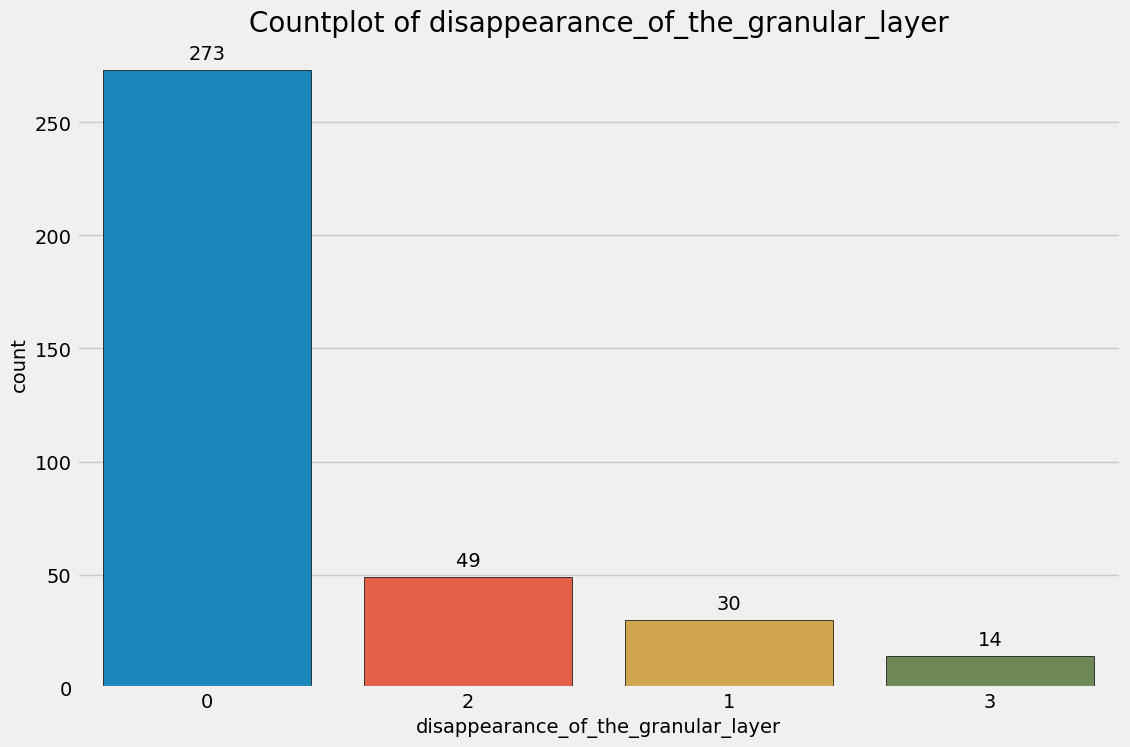

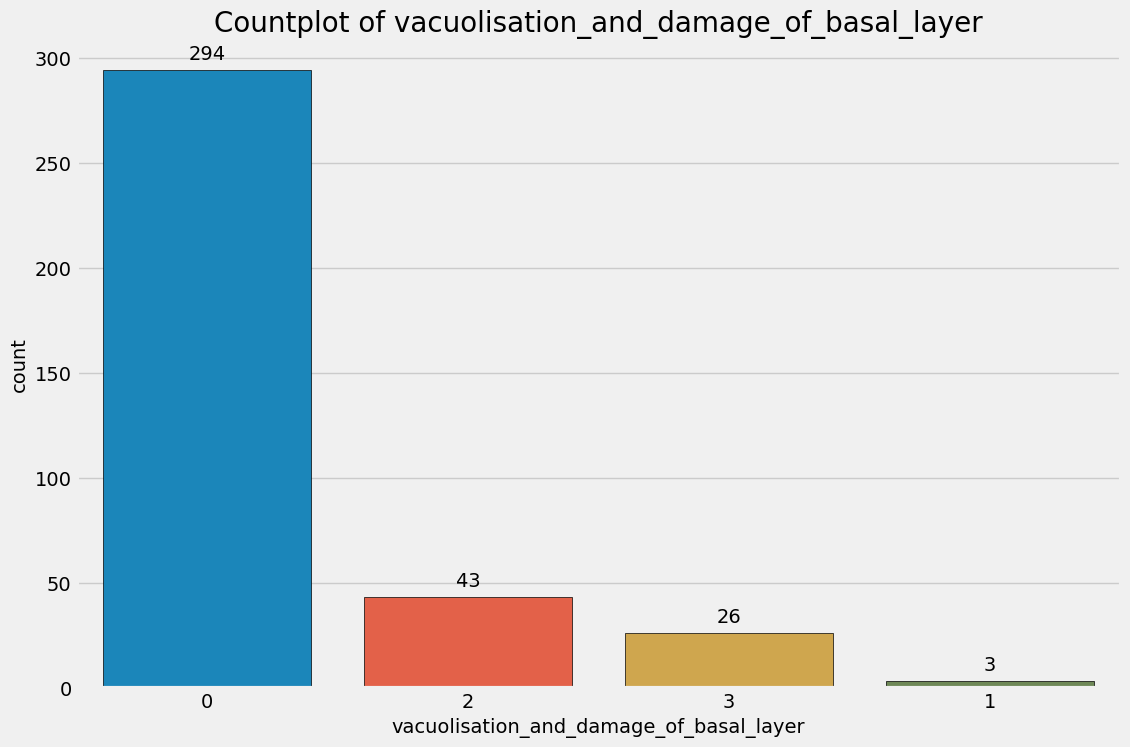

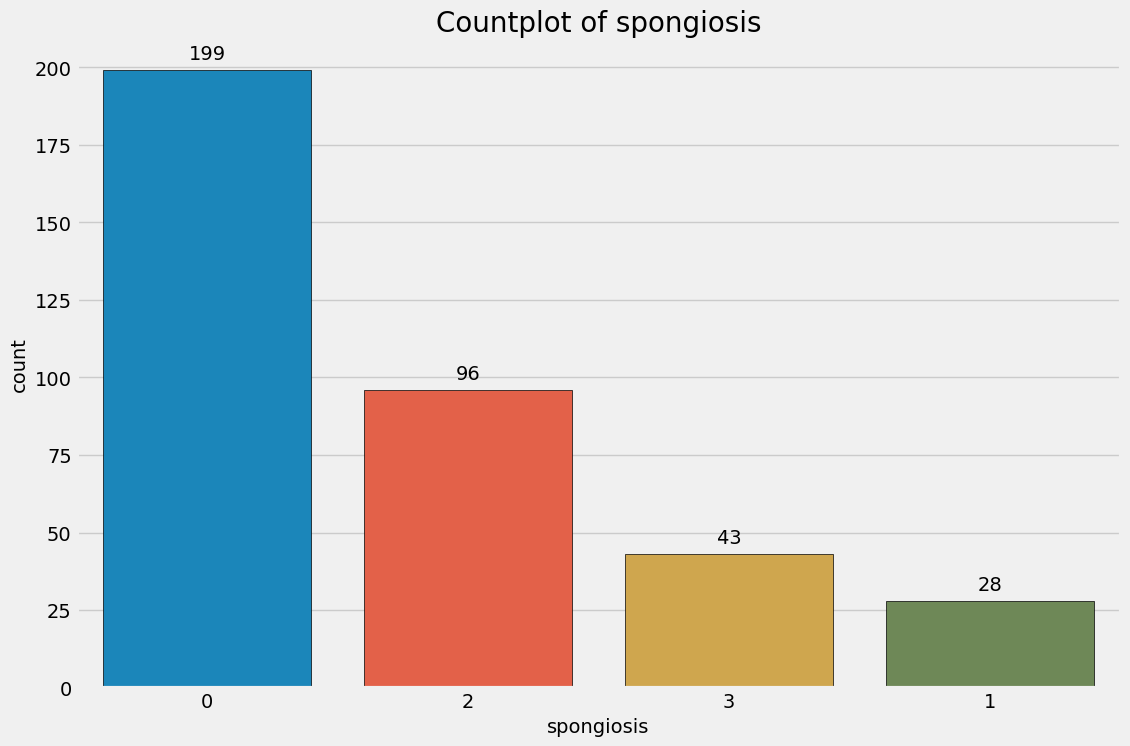

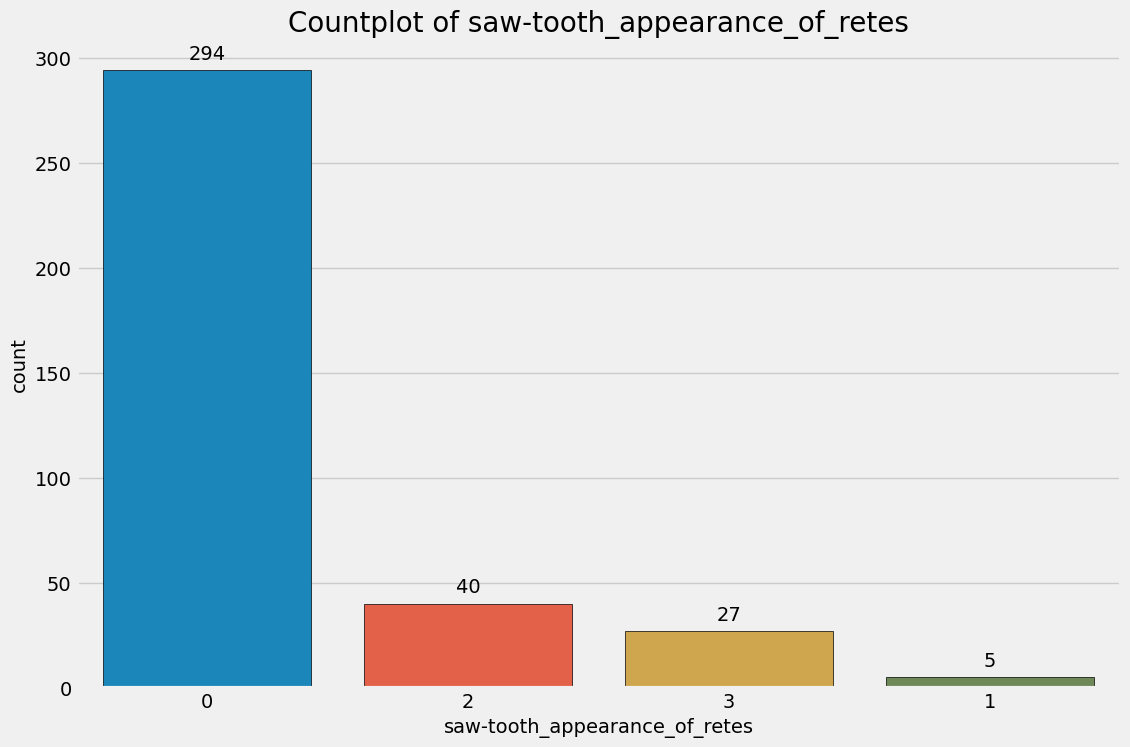

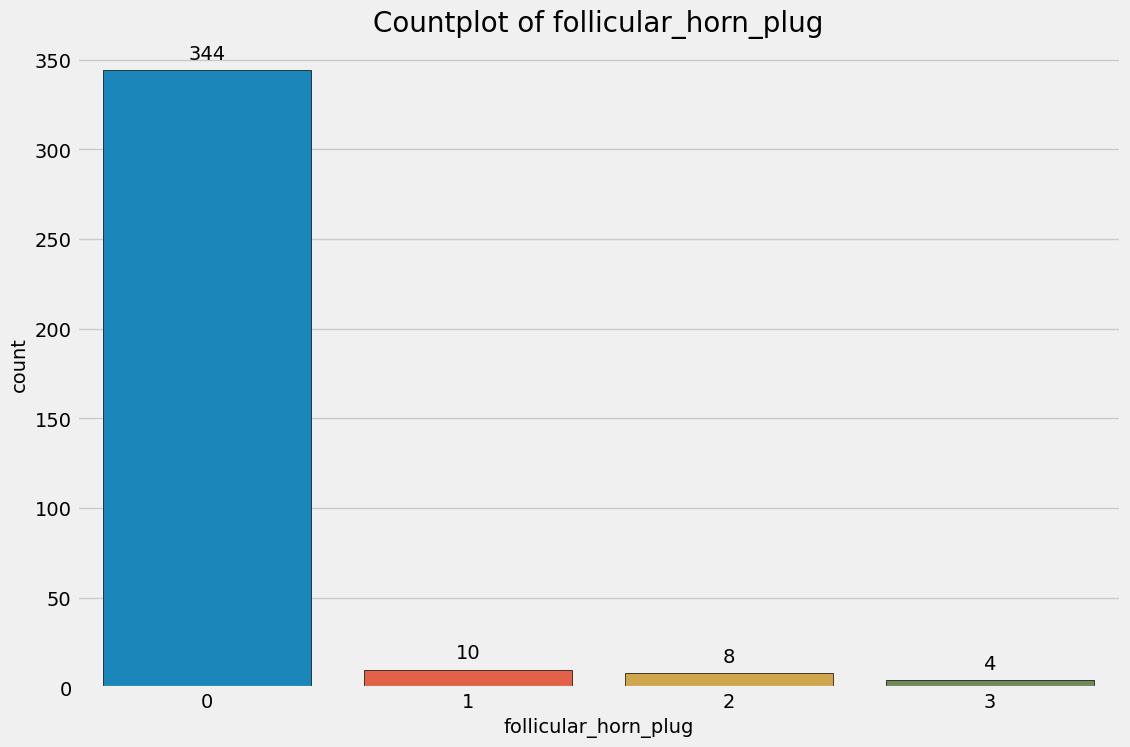

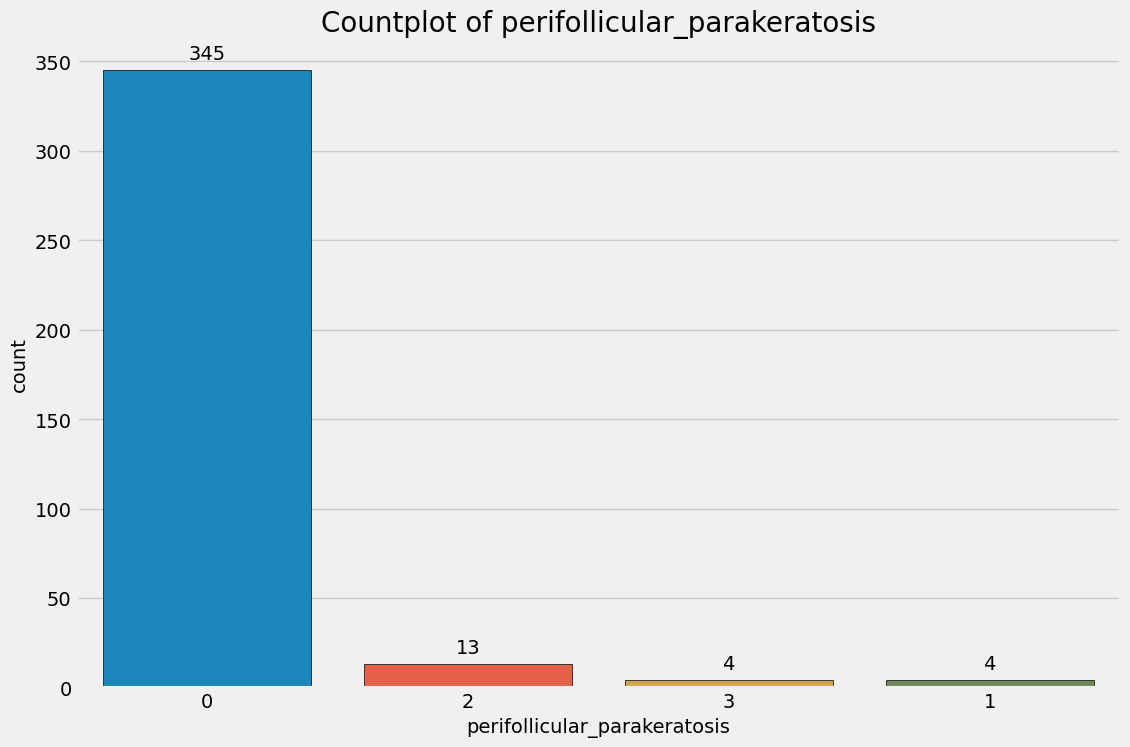

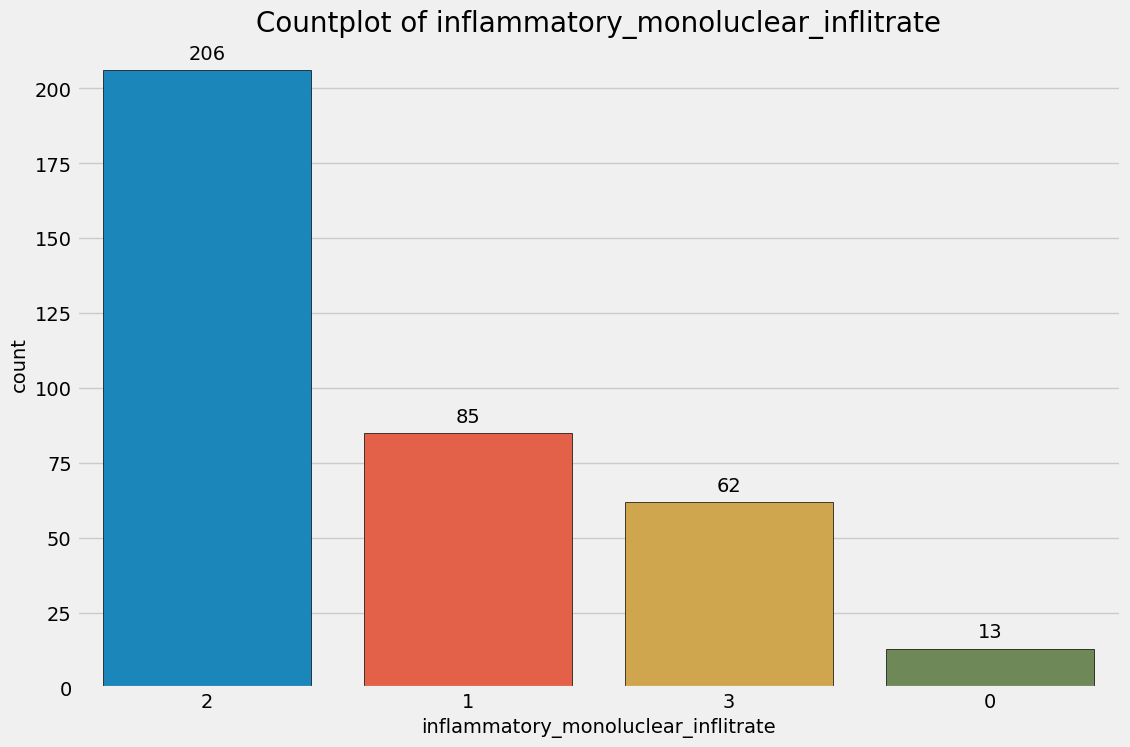

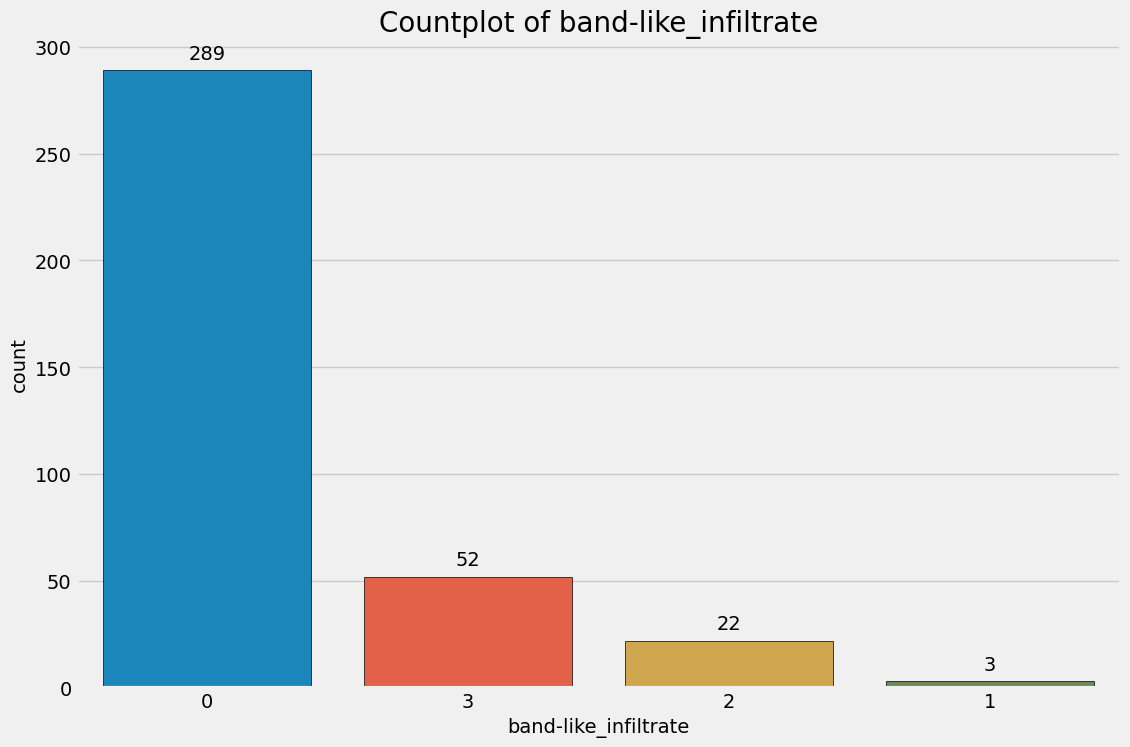

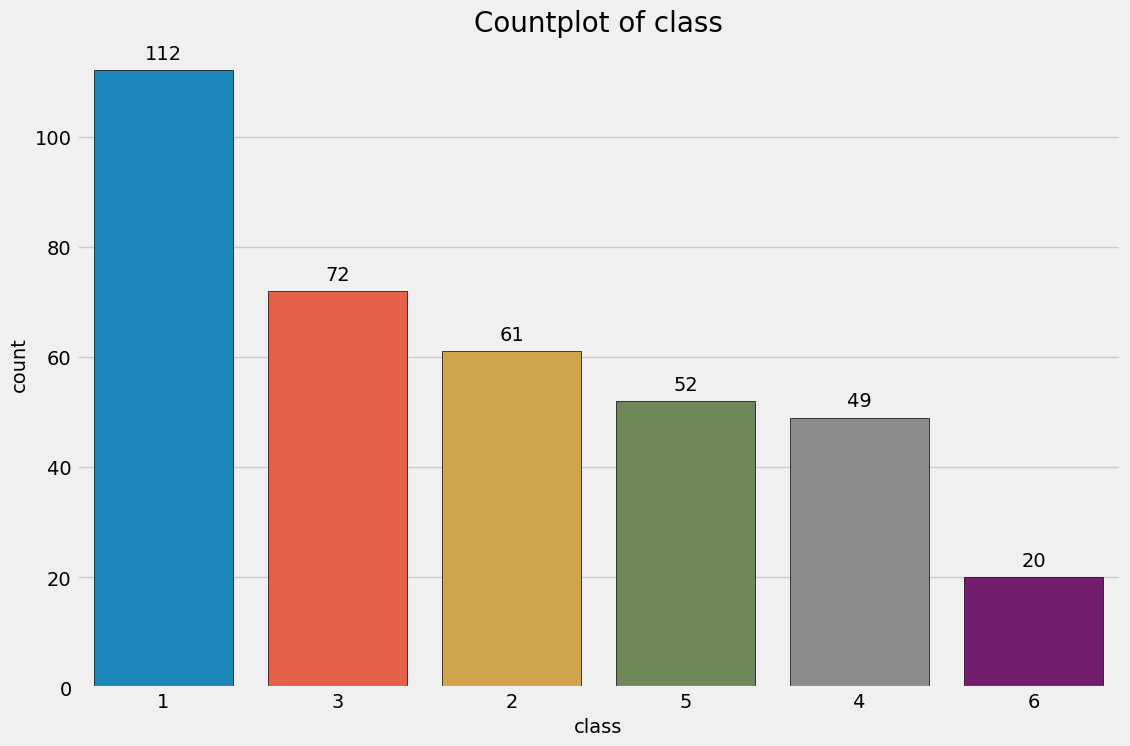

In [40]:
fast_eda(data)

Target looks like classification
Showing only top 10 of 33 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='class'>,
 [array([[<Axes: xlabel='Age', ylabel='Age'>]], dtype=object)],
 array([[<Axes: title={'center': 'elongation_of_the_rete_ridges'}, xlabel='count', ylabel='elongation_of_the...'>,
         <Axes: title={'center': 'clubbing_of_the_rete_ridges'}, xlabel='count', ylabel='clubbing_of_the_r...'>,
         <Axes: title={'center': 'thinning_of_the_suprapapillary_epidermis'}, xlabel='count', ylabel='thinning_of_the_s...'>,
         <Axes: title={'center': 'band-like_infiltrate'}, xlabel='count', ylabel='band-like_infiltrate'>,
         <Axes: title={'center': 'saw-tooth_appearance_of_retes'}, xlabel='count', ylabel='saw-tooth_appeara...'>],
        [<Axes: title={'center': 'vacuolisation_and_damage_of_basal_layer'}, xlabel='count', ylabel='vacuolisation_and...'>,
         <Axes: title={'center': 'melanin_incontinence'}, xlabel='count', ylabel='melanin_incontinence'>,
         <Axes: title={'center': 'focal_hypergr

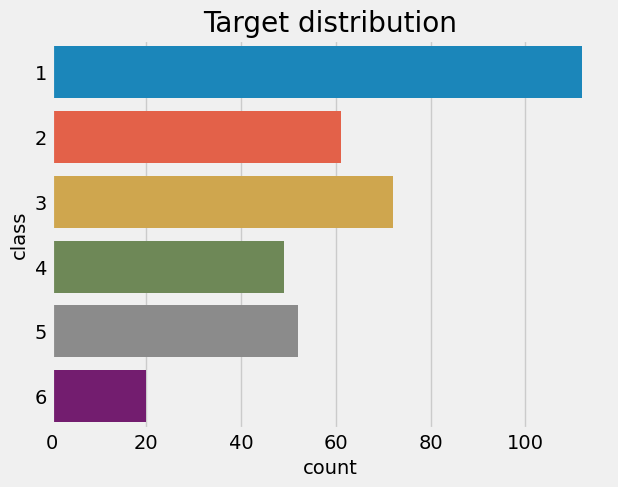

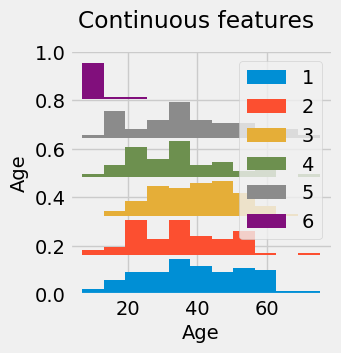

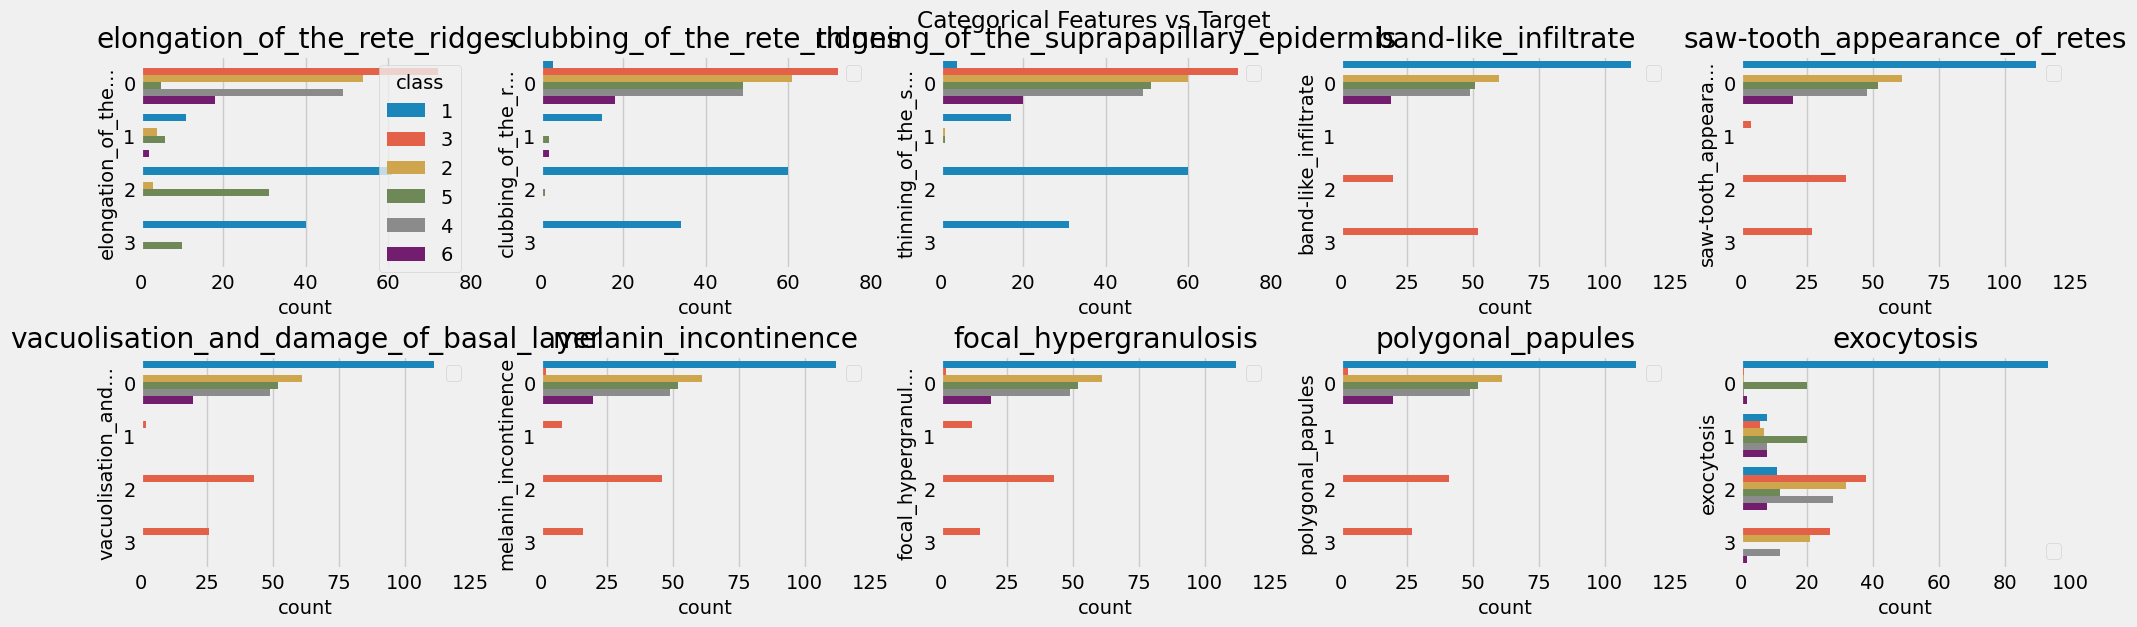

In [41]:
dabl.plot(data,target_col="class")

In [21]:
data.corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.014001,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.010195,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.135103,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.044865,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.083811,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.093712,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.375243,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.108523,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.068906,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.048073,-0.533208


- Feature selection

In [23]:
X=data.drop(columns = ['class'])
y=data['class']

- Model Selection

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

- Logistic Regression Model

Model is: LogisticRegression()


Training accuracy: 100.00%


Predictions are: [1 1 1 5 1 5 2 5 4 2 1 5 5 1 1 5 4 4 1 5 3 6 2 3 5 1 4 1 3 1 1 1 1 1 1 4 5
 2 2 1 2 2 3 1 3 1 2 1 2 3 3 1 3 2 1 6 3 2 2 4 6 3 4 1 5 2 1 1 3 1 5 1 1 4]


Accuracy: 94.59%


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       0.85      0.85      0.85        13
           3       1.00      1.00      1.00        11
           4       0.75      0.75      0.75         8
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         3

    accuracy                           0.95        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.95      0.95      0.95        74



Confusion Matrix:
 [[28  0  0  0  0  0]
 [ 0 11  0  2  0  0]
 [ 0  0 11  0  0  0]
 [ 0  2  0  6  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  3]]




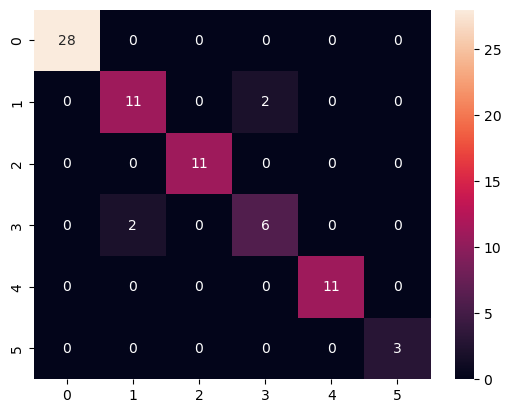

In [25]:
LR = LogisticRegression()

def prediction(LR_model):
    model = LR_model.fit(X_train, y_train)
    print('Model is: {}'.format(LR_model))
    print('\n')
    
    # Training score for a classifier is typically accuracy
    training_accuracy = model.score(X_train, y_train)
    print("Training accuracy: {:.2f}%".format(training_accuracy * 100))
    print('\n')

    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    
    # Accuracy is a common metric for classification problems
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print('\n')

    # Classification report provides precision, recall, and F1-score
    print("Classification Report:\n", classification_report(y_test, predictions))
    print('\n')

    # Confusion matrix shows true positive, true negative, false positive, false negative
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", cm)
    print('\n')
    sns.heatmap(cm, annot=True, fmt="d")

# Call the function with the KNN classifier
prediction(LR)

- Support Vector Machine Model

Model is: SVC()
Training accuracy: 91.07%
Predictions are: [1 1 1 5 1 5 2 5 4 2 1 5 5 1 1 5 4 4 1 5 3 6 2 3 5 1 2 1 3 1 1 1 6 2 1 4 5
 2 2 1 2 4 3 1 3 1 5 1 2 3 3 1 3 2 1 6 3 4 2 4 6 3 2 6 5 2 1 1 3 1 5 1 1 4]


Accuracy: 86.49%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.89      0.94        28
           2       0.69      0.69      0.69        13
           3       1.00      1.00      1.00        11
           4       0.62      0.62      0.62         8
           5       0.92      1.00      0.96        11
           6       0.60      1.00      0.75         3

    accuracy                           0.86        74
   macro avg       0.81      0.87      0.83        74
weighted avg       0.88      0.86      0.87        74

Confusion Matrix:
 [[25  1  0  0  0  2]
 [ 0  9  0  3  1  0]
 [ 0  0 11  0  0  0]
 [ 0  3  0  5  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  3]]


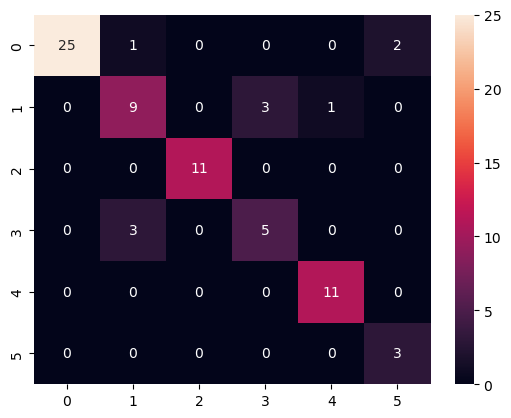

In [26]:
SC = SVC()
smote=SMOTE()

def SVM_prediction(SVC_model):
    X_smote, y_smote = smote.fit_resample(X_train,y_train)
    model = SVC_model.fit(X_smote, y_smote)
    print('Model is: {}'.format(SVC_model))
      
    # Training score for a classifier is typically accuracy
    training_accuracy = model.score(X_smote, y_smote)
    print("Training accuracy: {:.2f}%".format(training_accuracy * 100))

    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    
    # Accuracy is a common metric for classification problems
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Classification report provides precision, recall, and F1-score
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Confusion matrix shows true positive, true negative, false positive, false negative
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d")

# Call the function with the KNN classifier
SVM_prediction(SC)

- Decision Tree Model

Model is: DecisionTreeClassifier()
Training accuracy: 100.00%
Predictions are: [1 1 1 5 1 5 2 5 4 2 1 5 5 1 1 5 4 4 1 5 3 6 2 3 5 1 4 1 3 1 1 1 1 1 1 4 5
 4 2 1 2 2 3 1 3 1 2 1 2 3 3 1 3 2 1 6 3 2 4 4 6 3 4 1 5 2 1 1 3 1 5 1 1 4]


Accuracy: 97.30%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      0.85      0.92        13
           3       1.00      1.00      1.00        11
           4       0.80      1.00      0.89         8
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         3

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.98      0.97      0.97        74

Confusion Matrix:
 [[28  0  0  0  0  0]
 [ 0 11  0  2  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  3]]


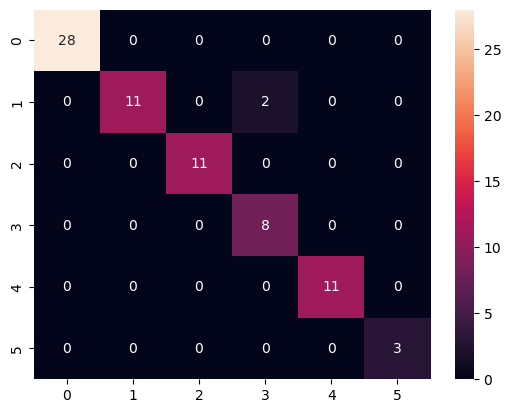

In [27]:
DT = DecisionTreeClassifier()
smote=SMOTE()

def DT_prediction(DT_model):
    X_smote, y_smote = smote.fit_resample(X_train,y_train)
    model = DT_model.fit(X_smote, y_smote)
    print('Model is: {}'.format(DT_model))
      
    # Training score for a classifier is typically accuracy
    training_accuracy = model.score(X_smote, y_smote)
    print("Training accuracy: {:.2f}%".format(training_accuracy * 100))

    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    
    # Accuracy is a common metric for classification problems
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Classification report provides precision, recall, and F1-score
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Confusion matrix shows true positive, true negative, false positive, false negative
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d")

# Call the function with the KNN classifier
DT_prediction(DT)

- K Nearest Neighbors Model

[0.08108108108108109, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.13513513513513514, 0.16216216216216217, 0.16216216216216217, 0.16216216216216217, 0.13513513513513514, 0.12162162162162163]


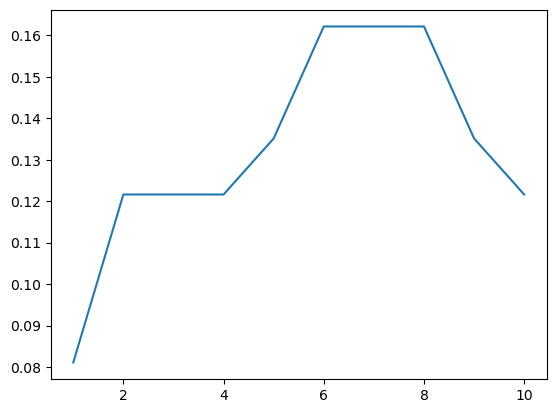

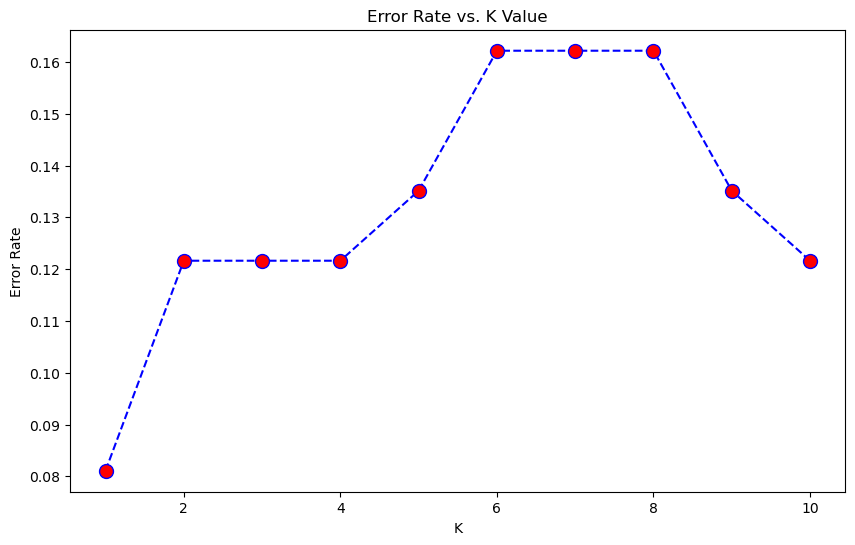

In [30]:
## taking optimal k to determine how many nearest neighbors  to create

    # create a list to store the error values for each k
error_rate = []

    # Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)
    
    
plt.plot(range(1,11),error_rate)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
    marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Model is: KNeighborsClassifier(n_neighbors=10)
Training accuracy: 88.01%
Predictions are: [1 1 1 5 1 5 2 5 4 2 1 2 5 1 2 5 4 4 1 5 3 6 2 3 5 1 4 1 3 1 1 1 6 2 1 4 5
 2 4 1 2 2 3 1 3 1 4 1 2 3 3 1 3 2 1 6 3 2 4 4 6 3 4 1 5 2 1 1 3 1 5 1 1 4]


Accuracy: 87.84%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.89      0.94        28
           2       0.69      0.69      0.69        13
           3       1.00      1.00      1.00        11
           4       0.64      0.88      0.74         8
           5       1.00      0.91      0.95        11
           6       0.75      1.00      0.86         3

    accuracy                           0.88        74
   macro avg       0.85      0.89      0.86        74
weighted avg       0.90      0.88      0.88        74

Confusion Matrix:
 [[25  2  0  0  0  1]
 [ 0  9  0  4  0  0]
 [ 0  0 11  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  1  0  0 10  0]
 [ 0  0  0  0  0  3]]


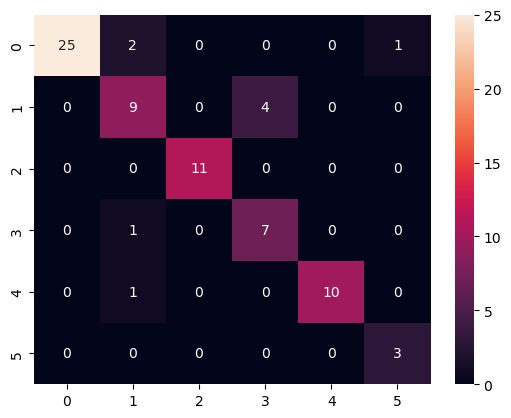

In [32]:
knn1 = KNeighborsClassifier(n_neighbors=10)

def knn_prediction(knn_model):
    
    model = knn_model.fit(X_train,y_train)
    print('Model is: {}'.format(knn_model))
      
    # Training score for a classifier is typically accuracy
    training_accuracy = model.score(X_train,y_train)
    print("Training accuracy: {:.2f}%".format(training_accuracy * 100))

    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    
    # Accuracy is a common metric for classification problems
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Classification report provides precision, recall, and F1-score
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Confusion matrix shows true positive, true negative, false positive, false negative
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d")

# Call the function with the KNN classifier
knn_prediction(knn1)
    

### The accuracy score received with decision tree classification comes out to be far better, which is 97%, as compared to logistic Regression accuracy as 94%.

## Conclusion

- Decision Tree Classifier  as our final model, save the model using best parameters

## Challenges Faced 

- Data cleansing 
- Understanding the data
- Doing Hyperparameter Tunning

## Overview of Project

- The deployed model demonstrated high accuracy in diagnosing skin diseases, offering a valuable tool for dermatologists to support their clinical assessments. This project highlights expertise in medical image analysis, machine learning in healthcare, and the potential for technology to enhance diagnostic capabilities.